In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import qutip as qt
plt.style.use(['science', 'ieee'])
# plt.style.use('science')

# QPSK alphabet

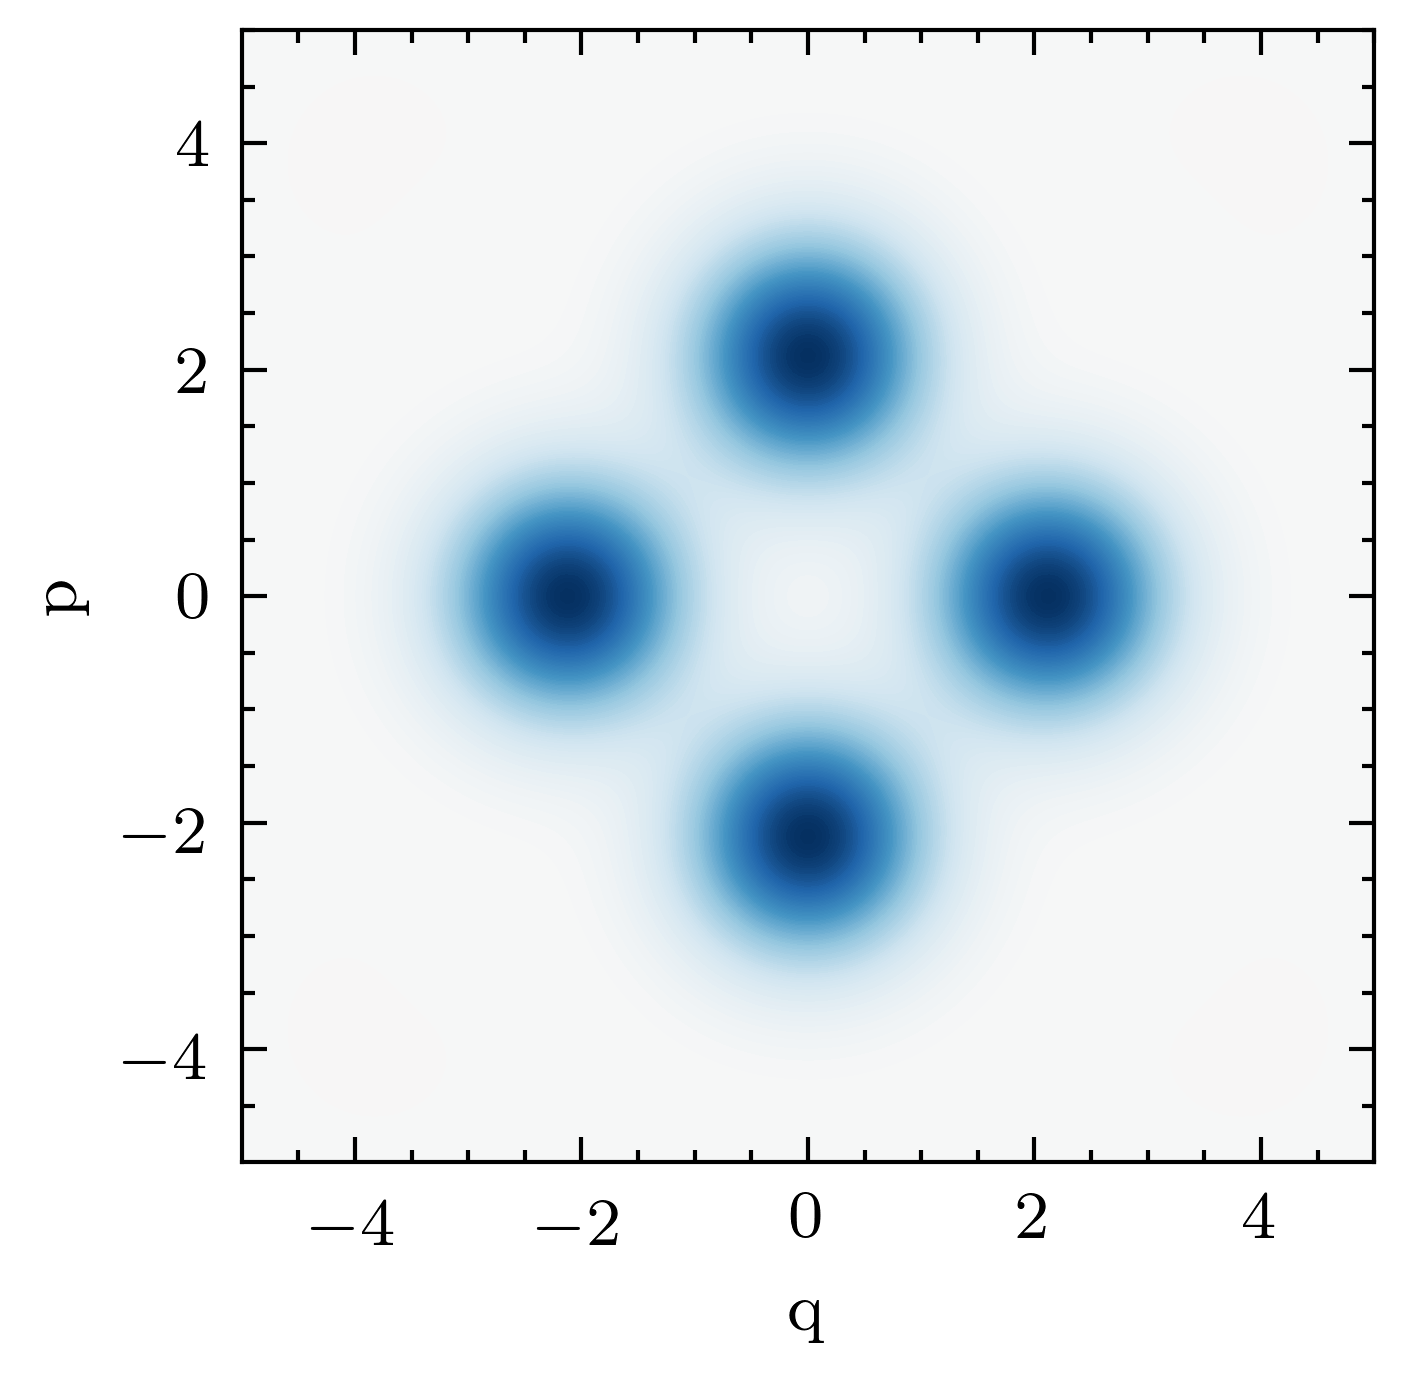

In [5]:
stateslist = np.full(4, 0, dtype="object")
dims=15
alpha=1.5
ampslist = [alpha, 1.0J * alpha, -alpha, -1.0J * alpha]
for idx, val in enumerate(ampslist):
    _state = qt.coherent_dm(dims, val, method="analytic")
#     stateslist = np.append(stateslist, _state)
    stateslist[idx]=_state

qpsk_alphabet = (1/4) * np.sum(stateslist, 0)
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W = qt.wigner(qpsk_alphabet, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)
# fig.savefig('qpsk_1.pdf')
fig.savefig('qpsk_1.png', dpi=300)

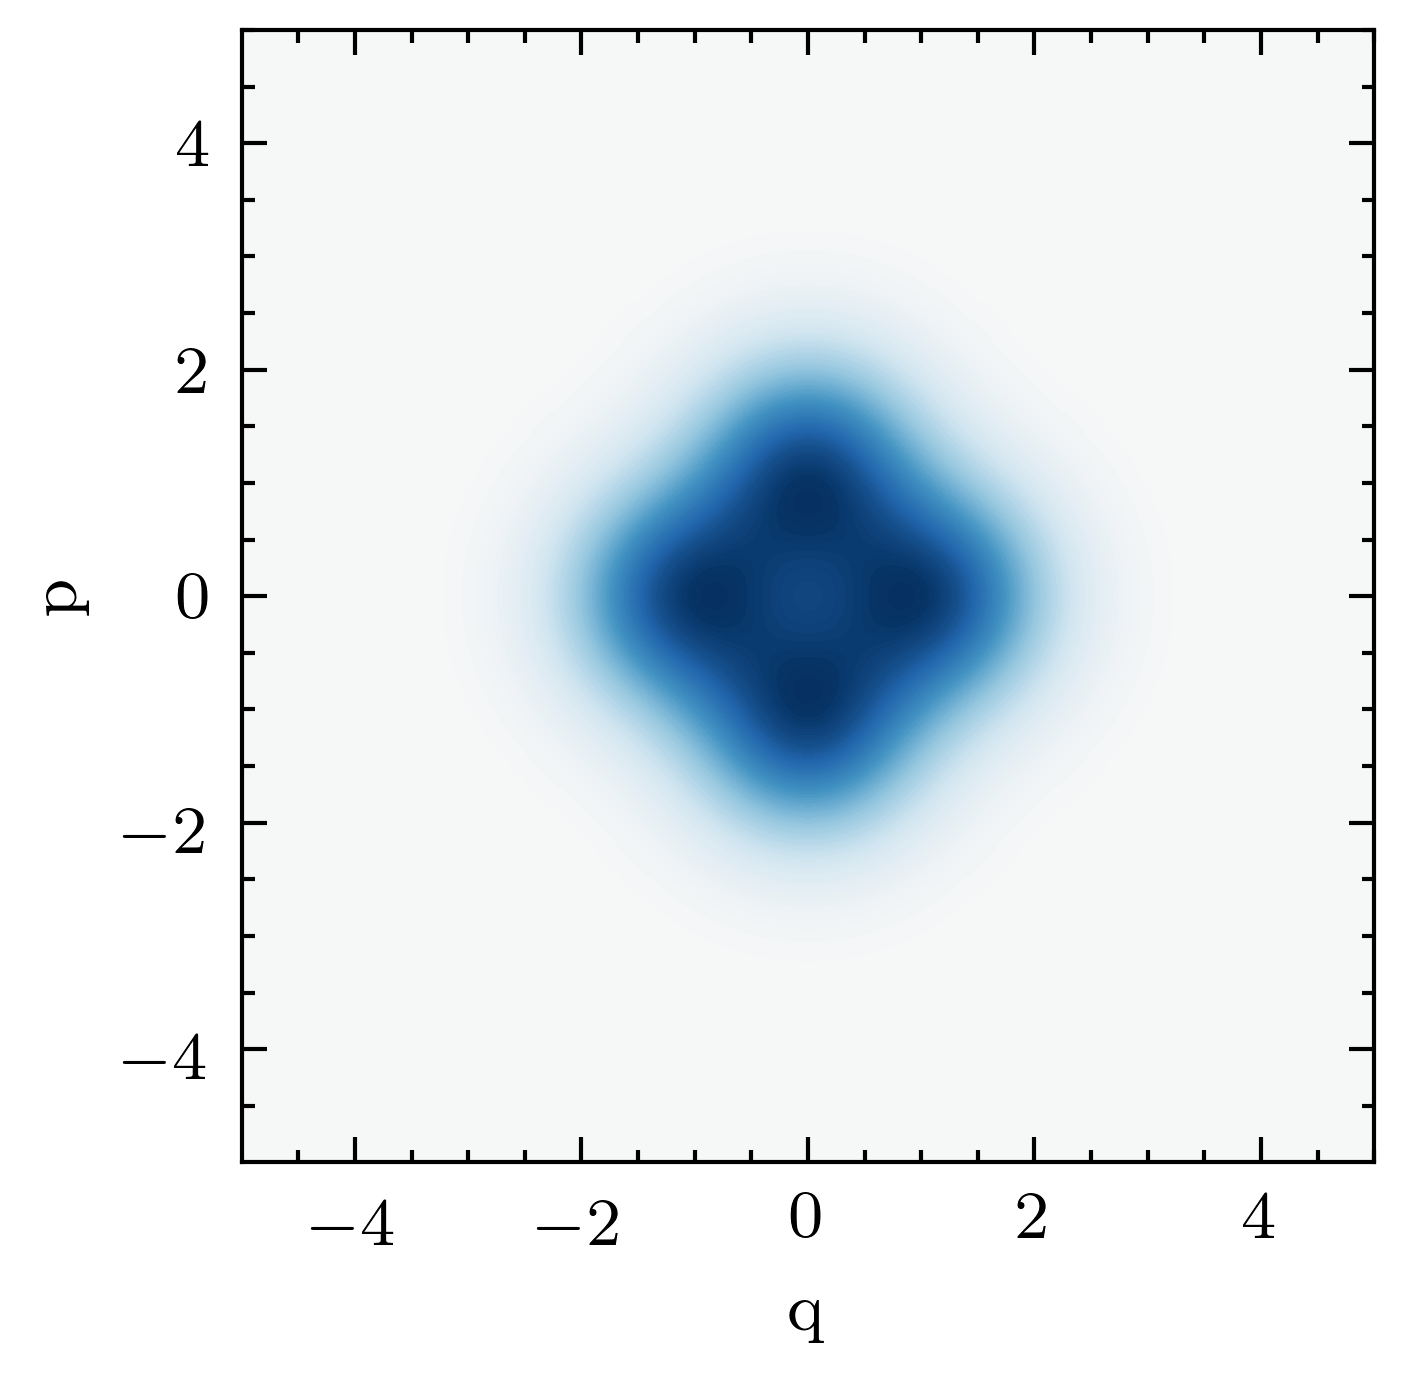

In [6]:
stateslist = np.full(4, 0, dtype="object")
dims=15
alpha=0.8
ampslist = [alpha, 1.0J * alpha, -alpha, -1.0J * alpha]
for idx, val in enumerate(ampslist):
    _state = qt.coherent_dm(dims, val, method="analytic")
#     stateslist = np.append(stateslist, _state)
    stateslist[idx]=_state

qpsk_alphabet = (1/4) * np.sum(stateslist, 0)
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W = qt.wigner(qpsk_alphabet, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())


fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)
# fig.savefig('qpsk_2.pdf')
fig.savefig('qpsk_2.png', dpi=300)

# Thermal state

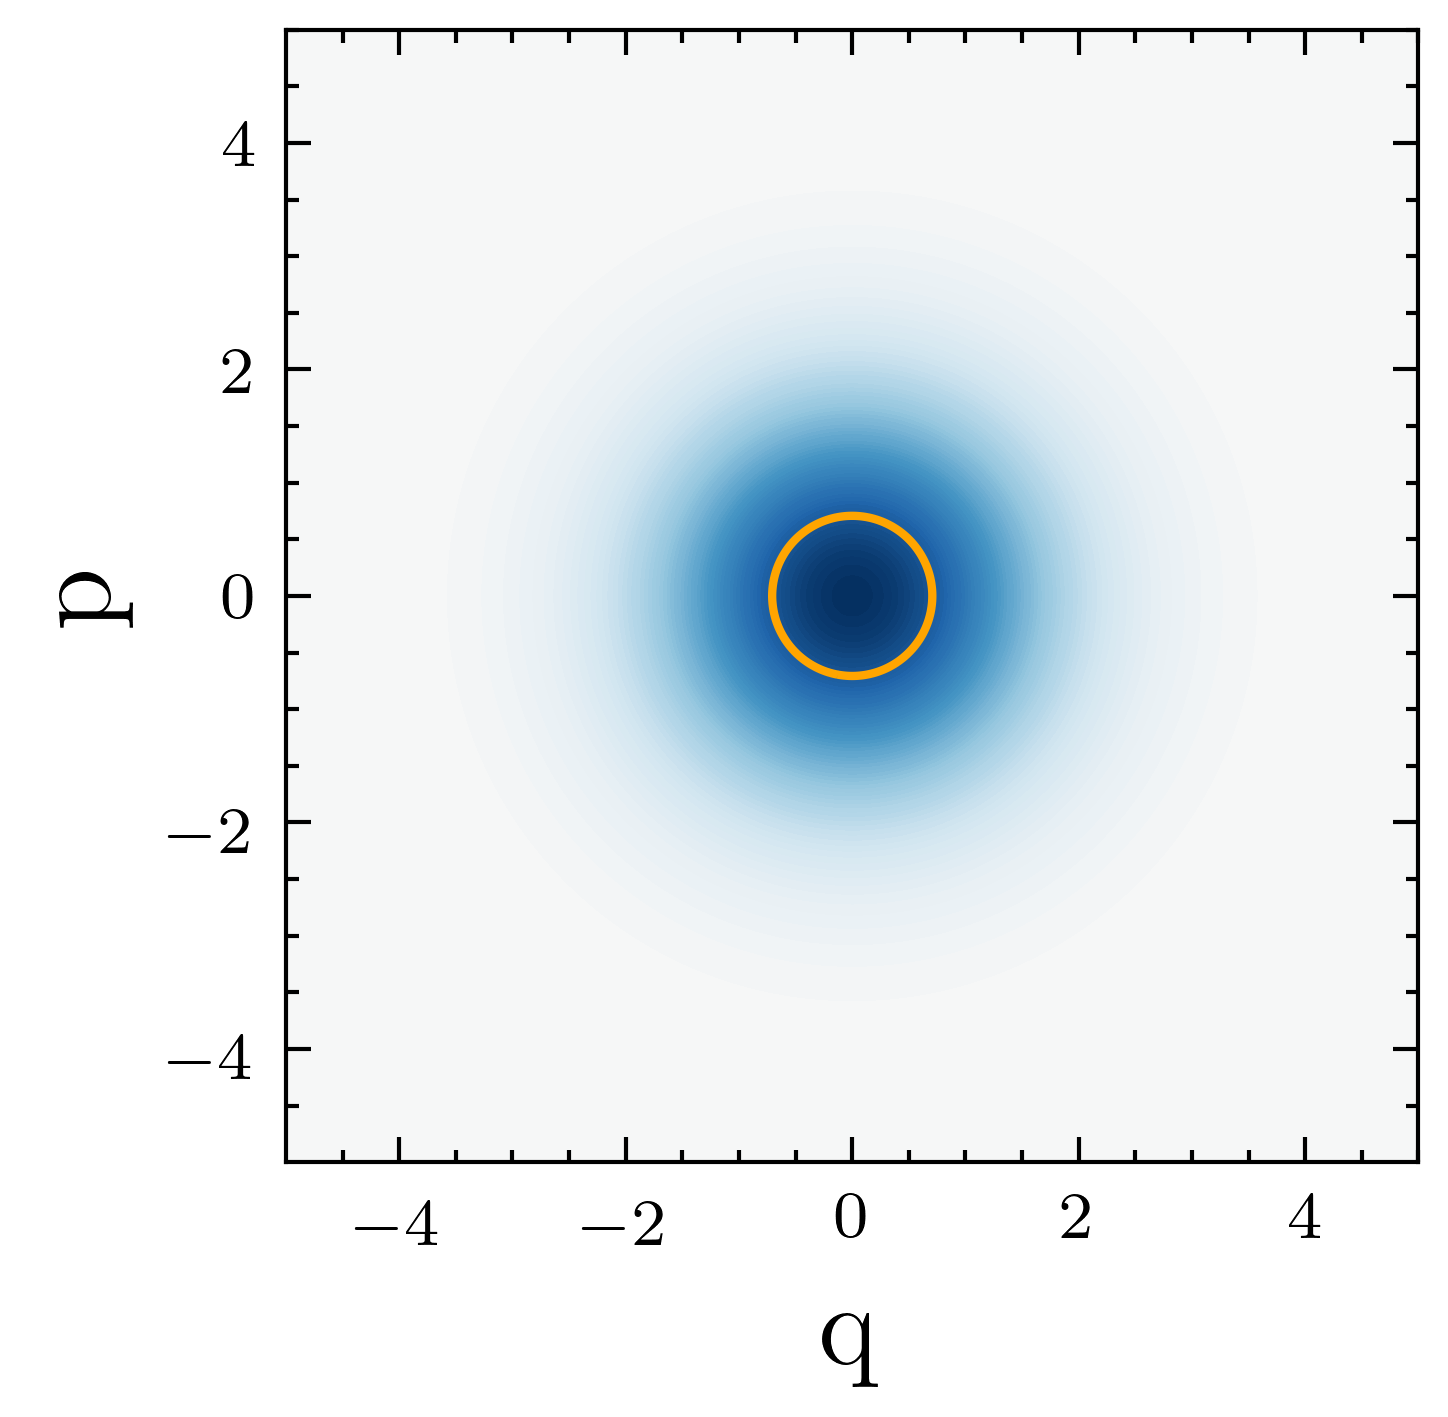

In [25]:
dims=25
barn=1.0
thermal_state = qt.thermal_dm(dims, barn, method="analytic")
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 500)
W = qt.wigner(thermal_state, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())


fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)

# x = np.linspace(-1.0, 1.0, 100)
# y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax.contour(X,Y,F,[0], colors=["orange"])

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

# fig.savefig('thermal_state.pdf')
fig.savefig('thermal_state.png', dpi=300)

# TMSV state

In [10]:
def barn2zeta(barn):
    """
    Converts average thermal photon number, barn,  in the thermal state (reduced state of tmsv) to the squeezing parameter \zeta required to give this level of barn.
    barn = np.sinh(zeta)**2
    therefore zeta = np.arcsinh(np.sqrt(barn))
    """
    return np.arcsinh(np.sqrt(barn))

def tmsv(barn, dims):
    _zeta = barn2zeta(barn)
    _prefactor = 1 / (np.cosh(_zeta)**2)
    _blankarray = np.zeros([dims, dims], dtype=object)
    
    for n in np.arange(0, dims-1):
        for m in np.arange(0, dims-1):
            _blankarray[n, m] = (np.tanh(_zeta)**(n + m)) * qt.tensor(qt.basis(dims, n), qt.basis(dims, n)) * qt.tensor(qt.basis(dims, m), qt.basis(dims, m)).trans()
    
    return np.sum(_prefactor * _blankarray)  

In [4]:
barn2zeta(0.5)

0.6584789484624084

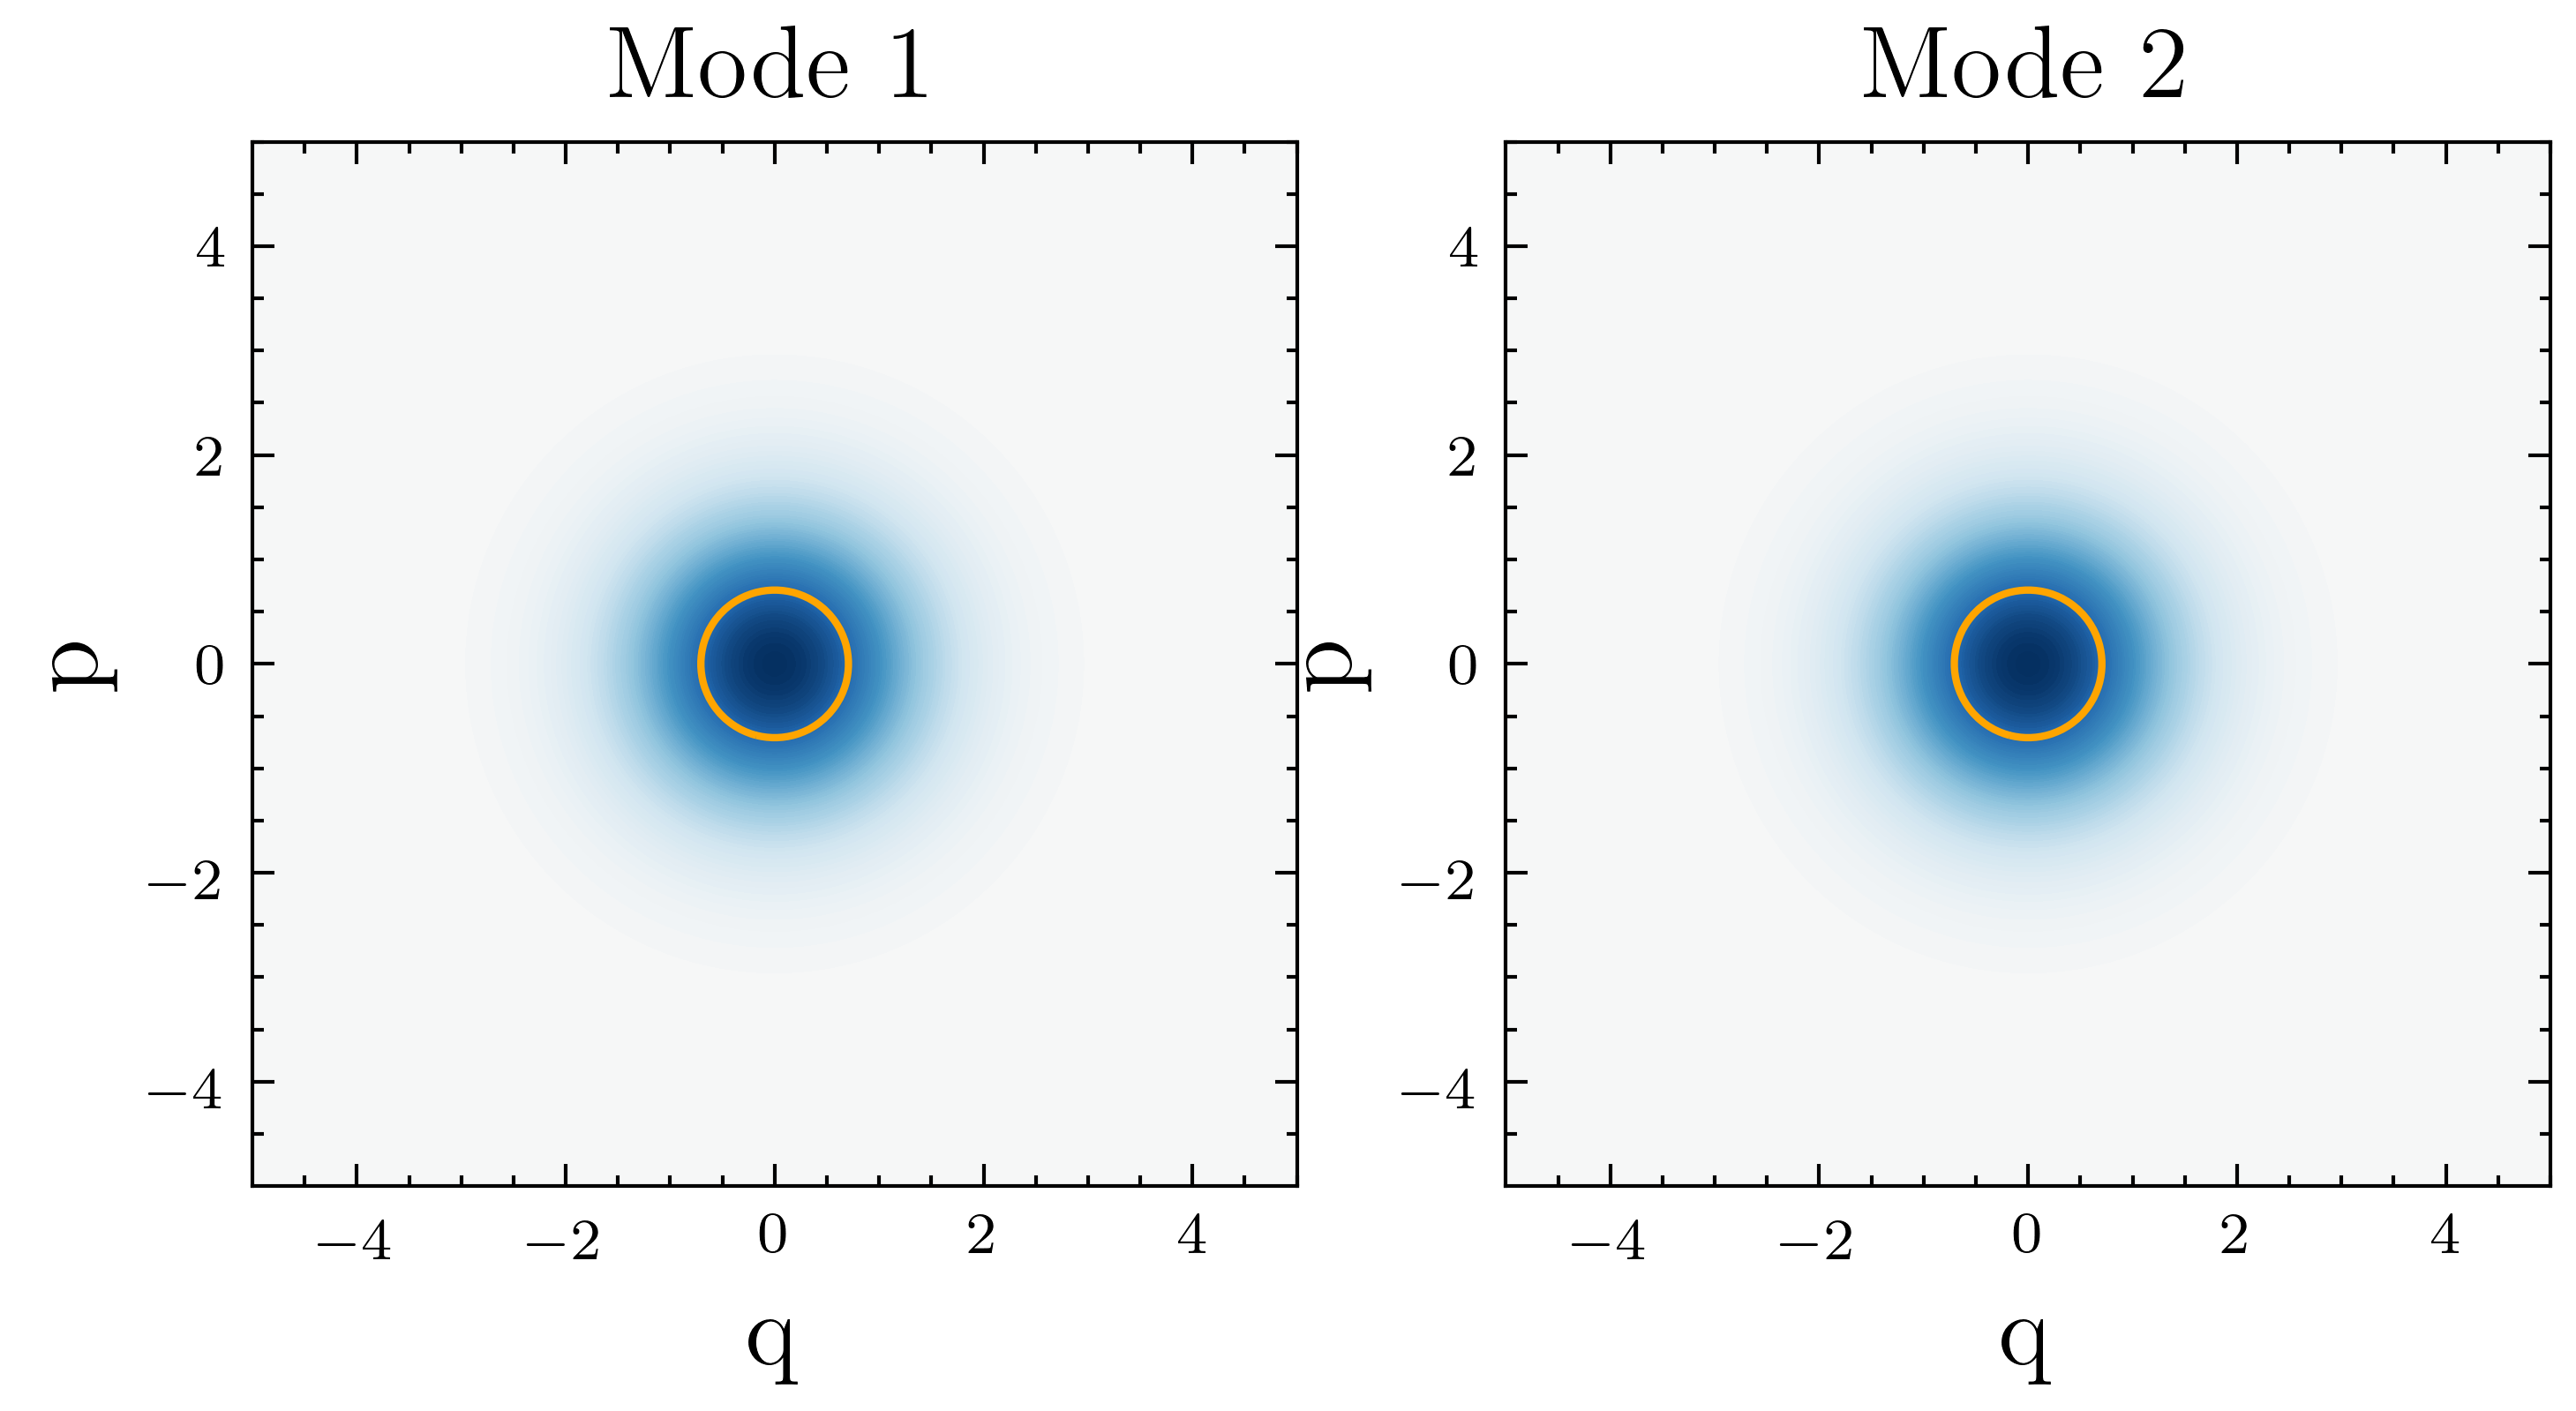

In [20]:
barn=0.5
dims=25
tmsv_state = tmsv(barn, dims)
x=2.8

xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(tmsv_state.ptrace(0), xvec, xvec)
W2 = qt.wigner(tmsv_state.ptrace(1), xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

fig, ax = plt.subplots(1, 2, figsize=(2*x, x))
ax[0].contourf(xvec, xvec, W1, 100, cmap=cm.RdBu, norm=nrm1)
ax[1].contourf(xvec, xvec, W2, 100, cmap=cm.RdBu, norm=nrm2)
ax[0].set_xlabel("q")
ax[0].set_ylabel("p")
ax[1].set_xlabel("q")
ax[1].set_ylabel("p")
ax[0].set_title("Mode 1", fontsize=14)
ax[1].set_title("Mode 2", fontsize=14)
ax[0].set_aspect(1)
ax[1].set_aspect(1)

ax[0].autoscale(tight=True)
ax[1].autoscale(tight=True)

ax[0].xaxis.label.set_size(14)
ax[0].yaxis.label.set_size(14)
ax[1].xaxis.label.set_size(14)
ax[1].yaxis.label.set_size(14)

X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax[0].contour(X,Y,F,[0], colors=["orange"])
ax[1].contour(X,Y,F,[0], colors=["orange"])

# fig.savefig('tmsv_wigner.pdf')
# fig.savefig('tmsv_wigner.png', dpi=300)

In [18]:
barn=0.5
dims=50
tmsv_state = tmsv(barn, dims)
x=2.8

xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 500)
W1 = qt.wigner(tmsv_state.ptrace(0), xvec, xvec)
W2 = qt.wigner(tmsv_state.ptrace(1), xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

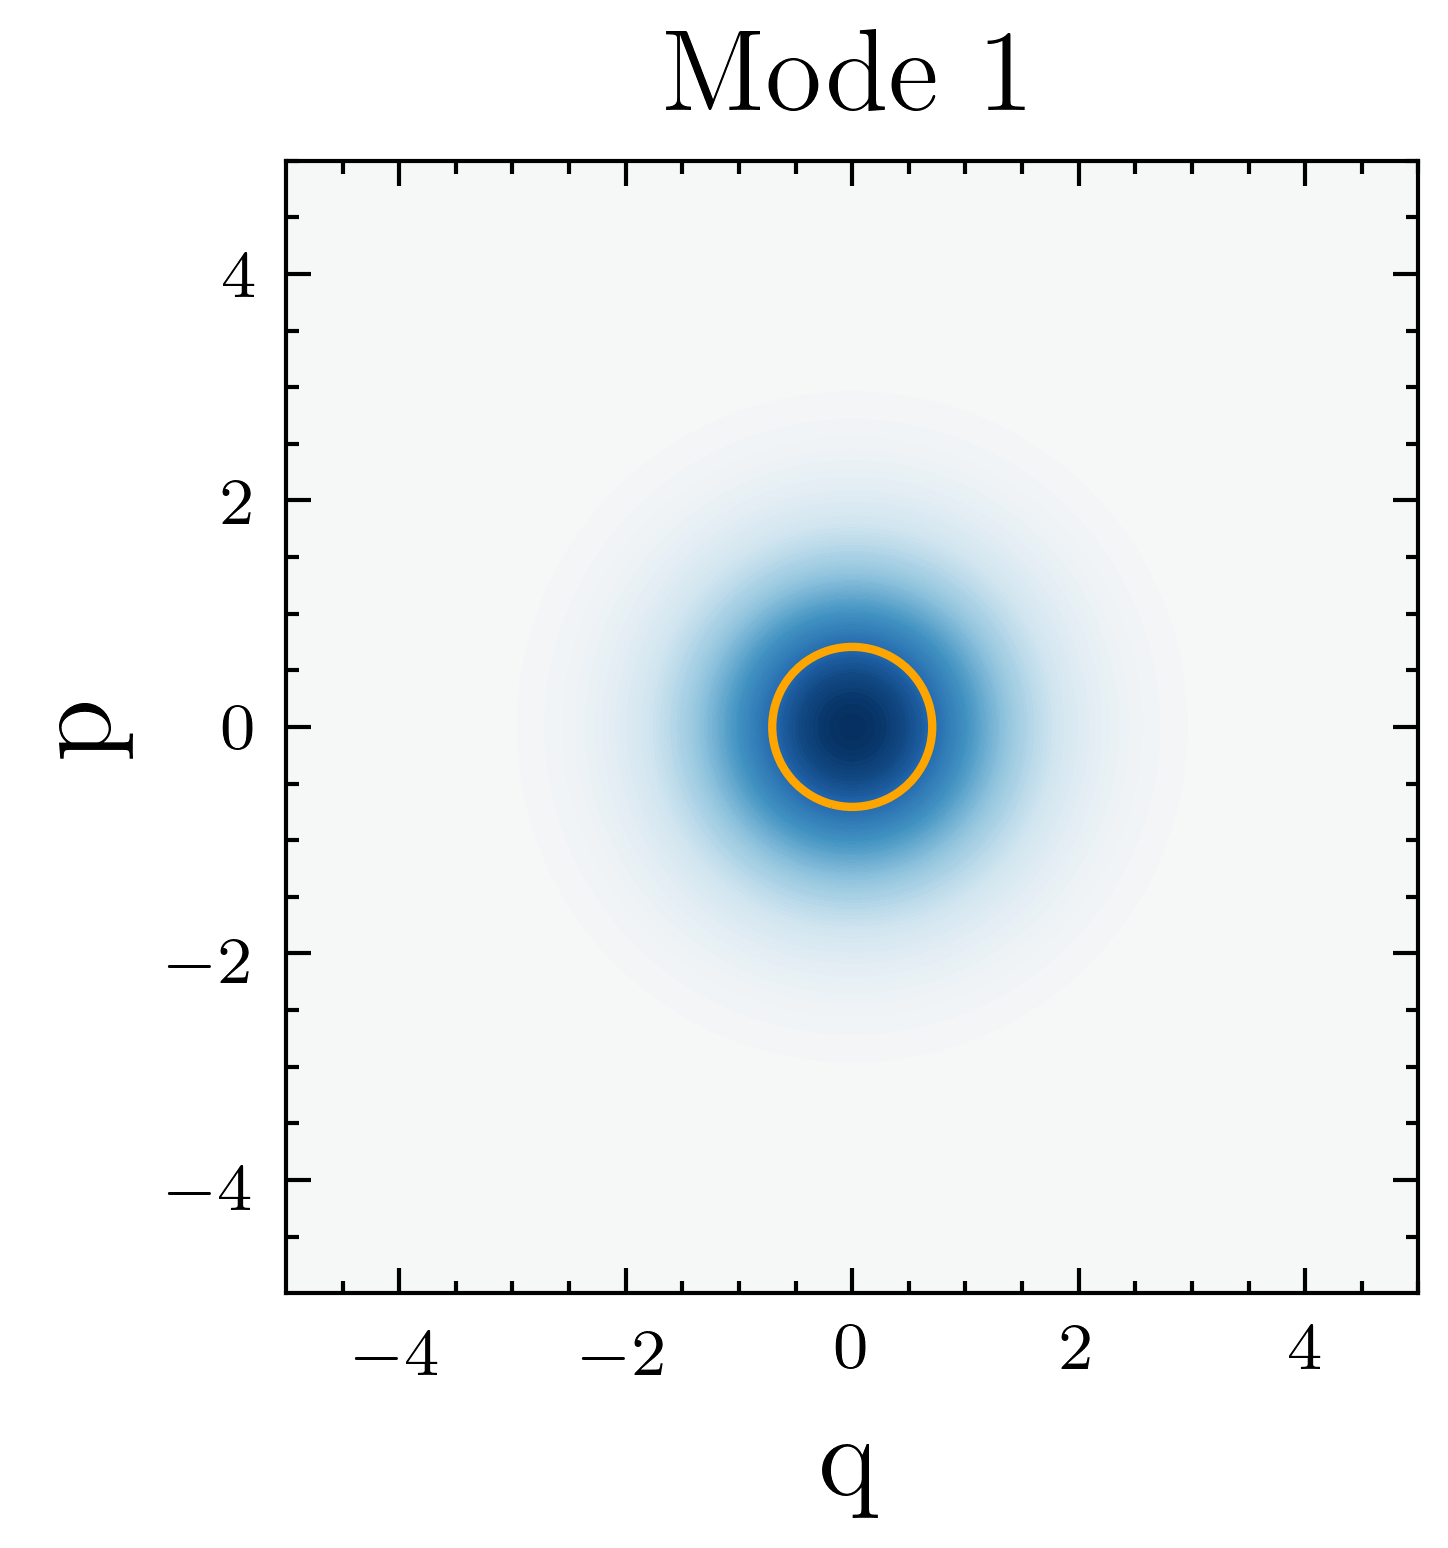

In [23]:
barn=0.5
dims=25
tmsv_state = tmsv(barn, dims)
x=2.8

xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(tmsv_state.ptrace(0), xvec, xvec)
W2 = qt.wigner(tmsv_state.ptrace(1), xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

fig, ax = plt.subplots()
ax.contourf(xvec, xvec, W1, 100, cmap=cm.RdBu, norm=nrm1)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.set_title("Mode 1", fontsize=14)
ax.set_aspect(1)

ax.autoscale(tight=True)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax.contour(X,Y,F,[0], colors=["orange"])

fig.savefig('tmsv_wigner_1.pdf')
fig.savefig('tmsv_wigner_1.png', dpi=300)

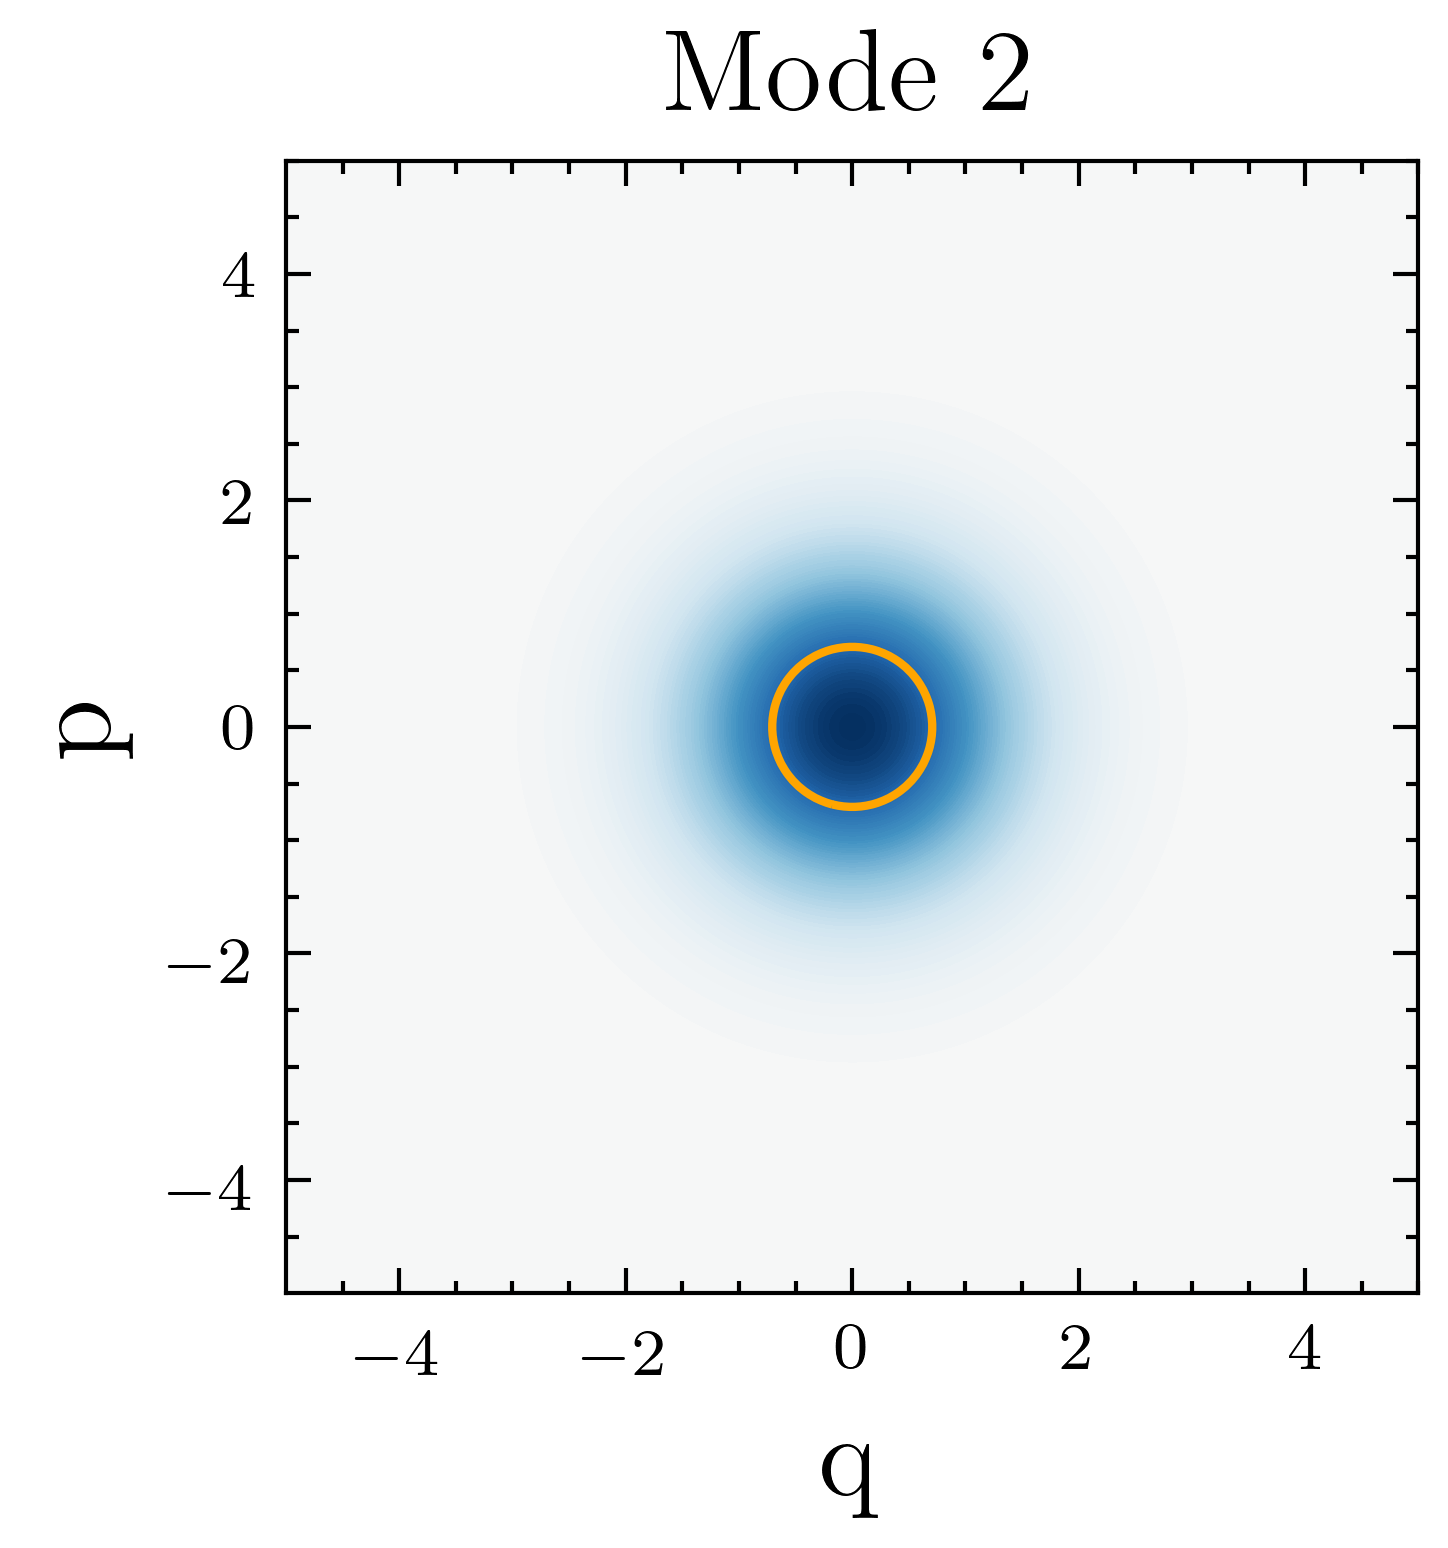

In [24]:
barn=0.5
dims=25
tmsv_state = tmsv(barn, dims)
x=2.8

xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(tmsv_state.ptrace(0), xvec, xvec)
W2 = qt.wigner(tmsv_state.ptrace(1), xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

fig, ax = plt.subplots()
ax.contourf(xvec, xvec, W2, 100, cmap=cm.RdBu, norm=nrm1)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.set_title("Mode 2", fontsize=14)
ax.set_aspect(1)

ax.autoscale(tight=True)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax.contour(X,Y,F,[0], colors=["orange"])

fig.savefig('tmsv_wigner_2.pdf')
fig.savefig('tmsv_wigner_2.png', dpi=300)

In [ ]:
barn=0.5
dims=100
tmsv_state = tmsv(barn, dims)
rho = tmsv_state
dims = rho.dims[0][0]
x=2.8

x_eigensystem = qt.position(dims).eigenstates()
x_eigenvalues = x_eigensystem[0]
x_eigenstates = x_eigensystem[1]

p_eigensystem = qt.momentum(dims).eigenstates()
p_eigenvalues = p_eigensystem[0]
p_eigenstates = p_eigensystem[1]


x_1_eigenstates = [qt.tensor(qt.ket2dm(x_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(x_eigenvalues))]
x_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(x_eigenstates[i])) for i in np.arange(len(x_eigenvalues))]

p_1_eigenstates = [qt.tensor(qt.ket2dm(p_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(p_eigenvalues))]
p_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(p_eigenstates[i])) for i in np.arange(len(p_eigenvalues))]


mymatX = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatX[i][j] = np.real((x_1_eigenstates[i] * x_2_eigenstates[j] * rho).tr())


mymatP = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatP[i][j] = np.real((p_1_eigenstates[i] * p_2_eigenstates[j] * rho).tr())

fig, axes = plt.subplots(1, 2, figsize=(2*x, x))

xplot = axes[0].imshow(np.array(mymatX), origin=0)#extent=[x_2_min, x_2_max, x_1_min, x_1_max])
pplot = axes[1].imshow(np.array(mymatP), origin=0)# extent=[p_2_min, p_2_max, p_1_min, p_1_max])
axes[0].set_aspect(1)
axes[1].set_aspect(1)

axes[0].set_xlabel("$q_2$")
axes[0].set_ylabel("$q_1$")
axes[1].set_xlabel("$p_2$")
axes[1].set_ylabel("$p_1$")

axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])

axes[0].xaxis.label.set_size(14)
axes[0].yaxis.label.set_size(14)

axes[1].xaxis.label.set_size(14)
axes[1].yaxis.label.set_size(14)

fig.savefig('tmsv_histogram_larger_hilbert.pdf')
fig.savefig('tmsv_histogram_larger_hilbert.png', dpi=300)

# NPSK

In [21]:
# N = 4;
# alpha=1.0;



# dims = 15
# alpha = 1.5
# for idx, val in enumerate(ampslist):
#     _state = qt.coherent_dm(dims, val, method="analytic")
#     stateslist[idx]=_state
    
# npsk_alphabet = (1/N) * np.sum(stateslist,0)

def npsk(N=4, alpha=1.5):
    dims=15
    stateslist = np.full(N, 0, dtype="object")
    _phaselist = np.arange(0, N, 1) * 2 * np.pi / N
    ampslist = alpha * np.exp(1.0J * _phaselist)
    
    for idx, val in enumerate(ampslist):
        _state = qt.coherent_dm(dims, val, method="analytic")
        stateslist[idx]=_state
    
    npsk_alphabet = (1/N) * np.sum(stateslist,0)
    return npsk_alphabet
    



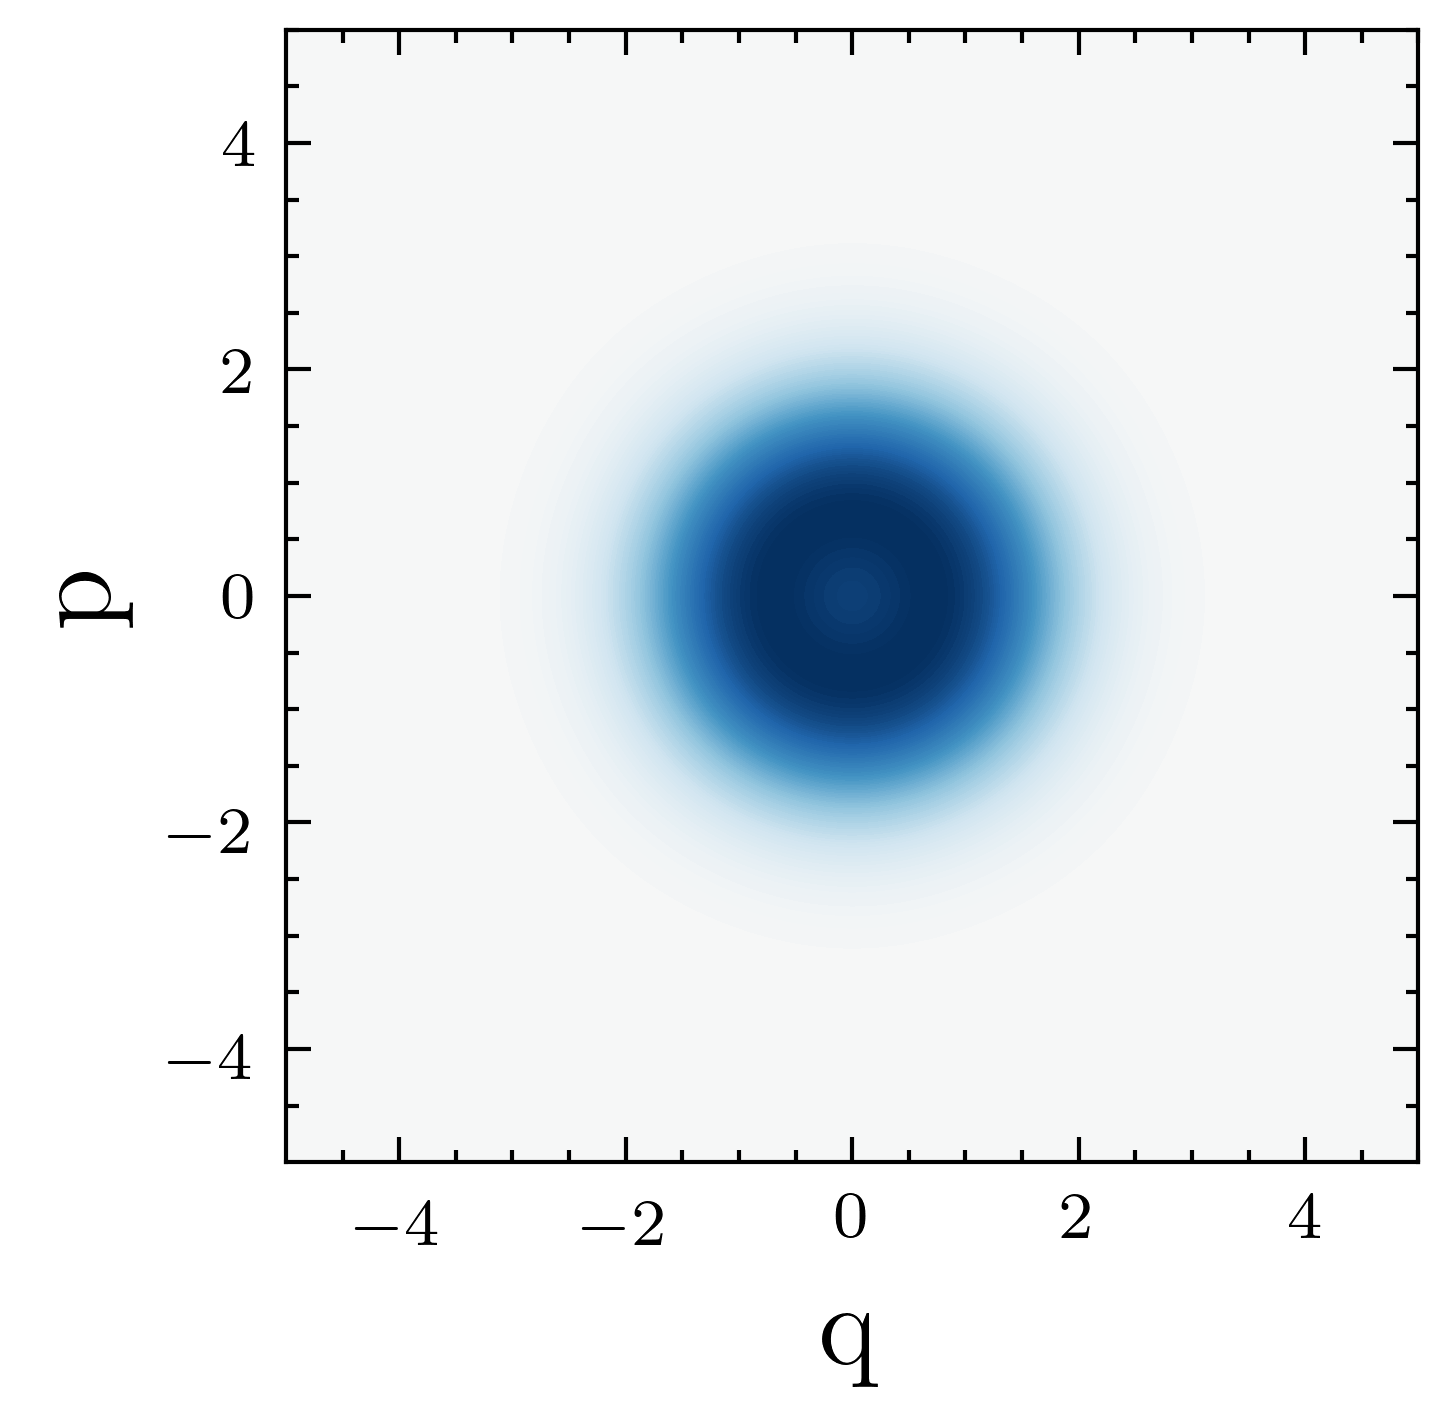

In [24]:
N=8
alpha=0.8

xmin = - 5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W = qt.wigner(npsk(N, alpha), xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())


fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)

ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

fig.savefig("8psk_2.png", dpi=300)
# fig.savefig('qpsk_2.png', dpi=300)

In [ ]:
stateslist = np.full(4, 0, dtype="object")
dims=15
alpha=1.5
ampslist = [alpha, 1.0J * alpha, -alpha, -1.0J * alpha]
for idx, val in enumerate(ampslist):
    _state = qt.coherent_dm(dims, val, method="analytic")
#     stateslist = np.append(stateslist, _state)
    stateslist[idx]=_state

qpsk_alphabet = (1/4) * np.sum(stateslist, 0)
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W = qt.wigner(qpsk_alphabet, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)
# fig.savefig('qpsk_1.pdf')
fig.savefig('qpsk_1.png', dpi=300)

# Fock state Wigner function

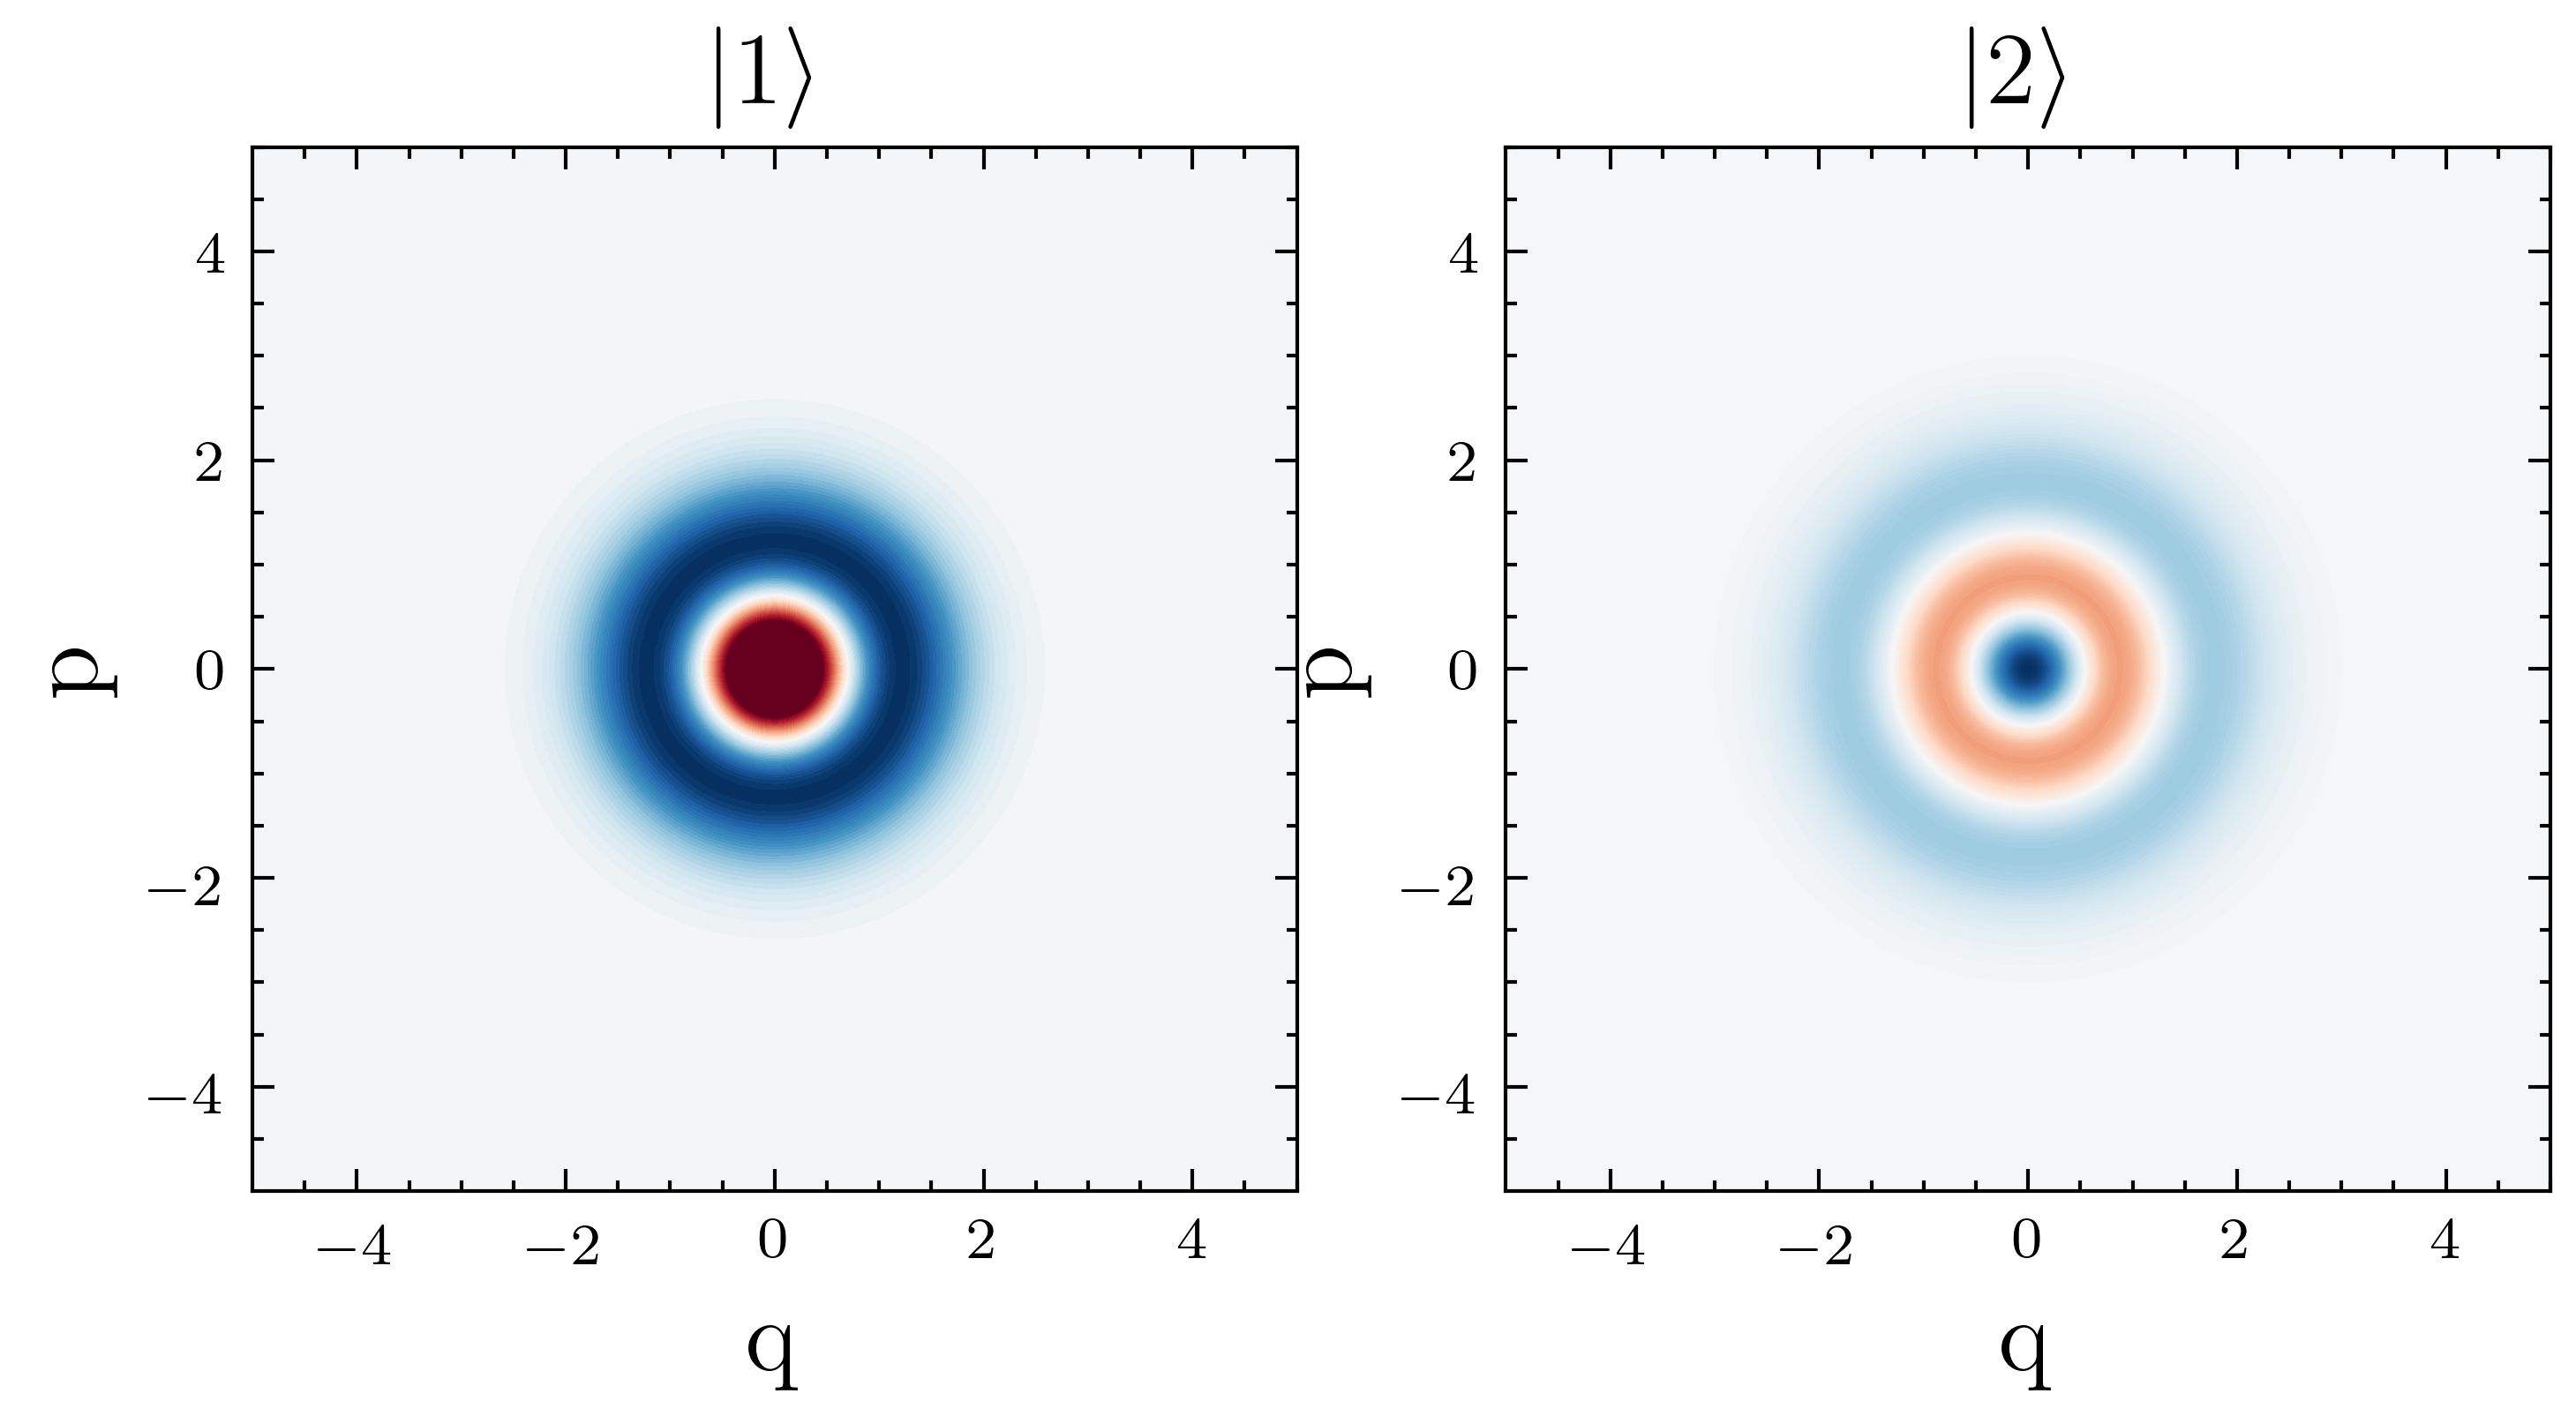

In [3]:
barn=0.5
dims=25
fock_1 = qt.fock_dm(dims, 1)
fock_2 = qt.fock_dm(dims, 2)
x=2.8

xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(fock_1, xvec, xvec)
W2 = qt.wigner(fock_2, xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

fig, ax = plt.subplots(1, 2, figsize=(2*x, x))
ax[0].contourf(xvec, xvec, W1, 100, cmap=cm.RdBu, norm=nrm1)
ax[1].contourf(xvec, xvec, W2, 100, cmap=cm.RdBu, norm=nrm2)
ax[0].set_xlabel("q")
ax[0].set_ylabel("p")
ax[1].set_xlabel("q")
ax[1].set_ylabel("p")
ax[0].set_title("$|1\\rangle$", fontsize=14)
ax[1].set_title("$|2\\rangle$", fontsize=14)
ax[0].set_aspect(1)
ax[1].set_aspect(1)

ax[0].autoscale(tight=True)
ax[1].autoscale(tight=True)

ax[0].xaxis.label.set_size(14)
ax[0].yaxis.label.set_size(14)
ax[1].xaxis.label.set_size(14)
ax[1].yaxis.label.set_size(14)



# fig.savefig('fock_wigner.pdf')
# fig.savefig('fock_wigner.png', dpi=300)

In [4]:
dims=25
fock_1 = qt.fock_dm(dims, 1)
fock_2 = qt.fock_dm(dims, 2)
x=2.8
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(fock_1, xvec, xvec)
W2 = qt.wigner(fock_2, xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

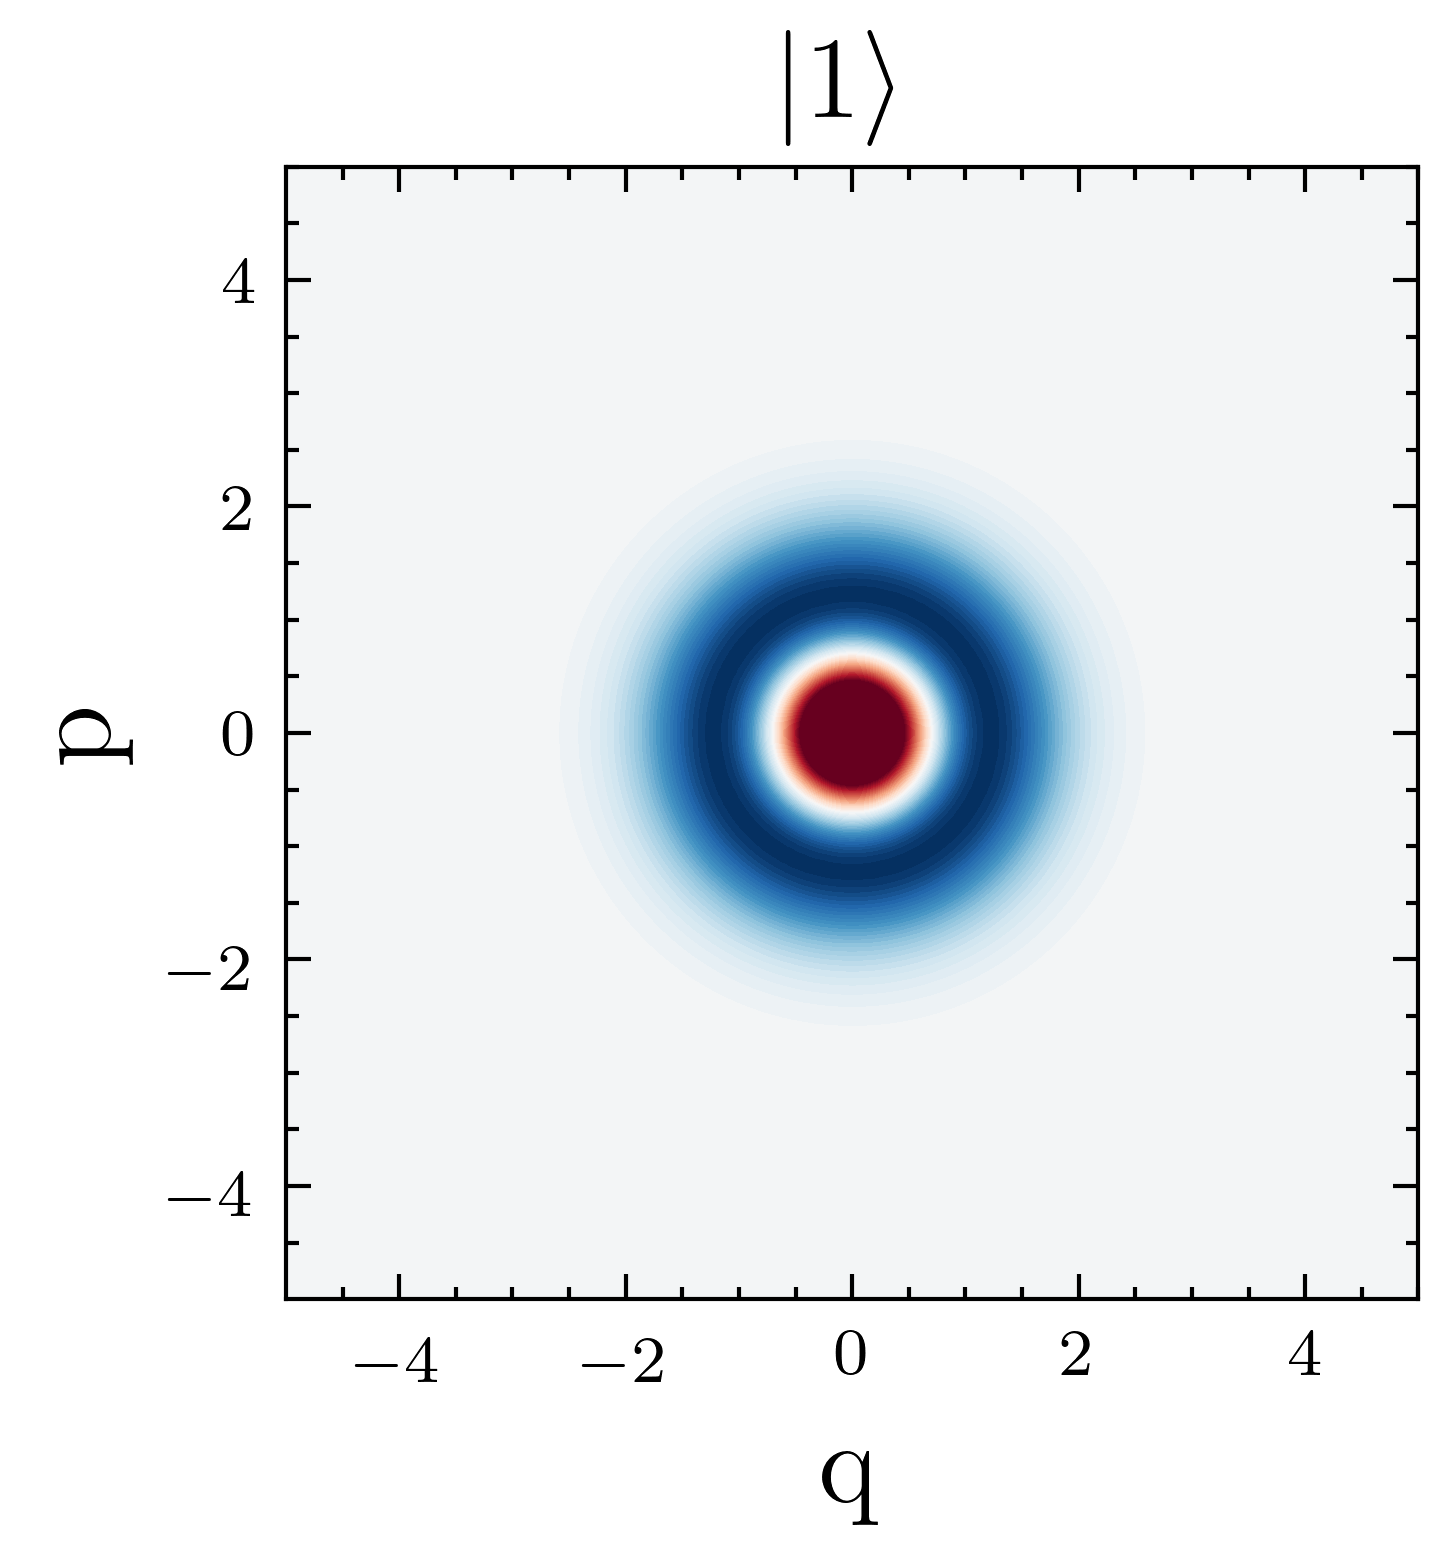

In [5]:
fig, ax = plt.subplots()
ax.contourf(xvec, xvec, W1, 100, cmap=cm.RdBu, norm=nrm1)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.set_title("$|1\\rangle$", fontsize=14)
ax.set_aspect(1)

ax.autoscale(tight=True)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)



fig.savefig('fock_wigner_1.pdf')
fig.savefig('fock_wigner_1.png', dpi=300)

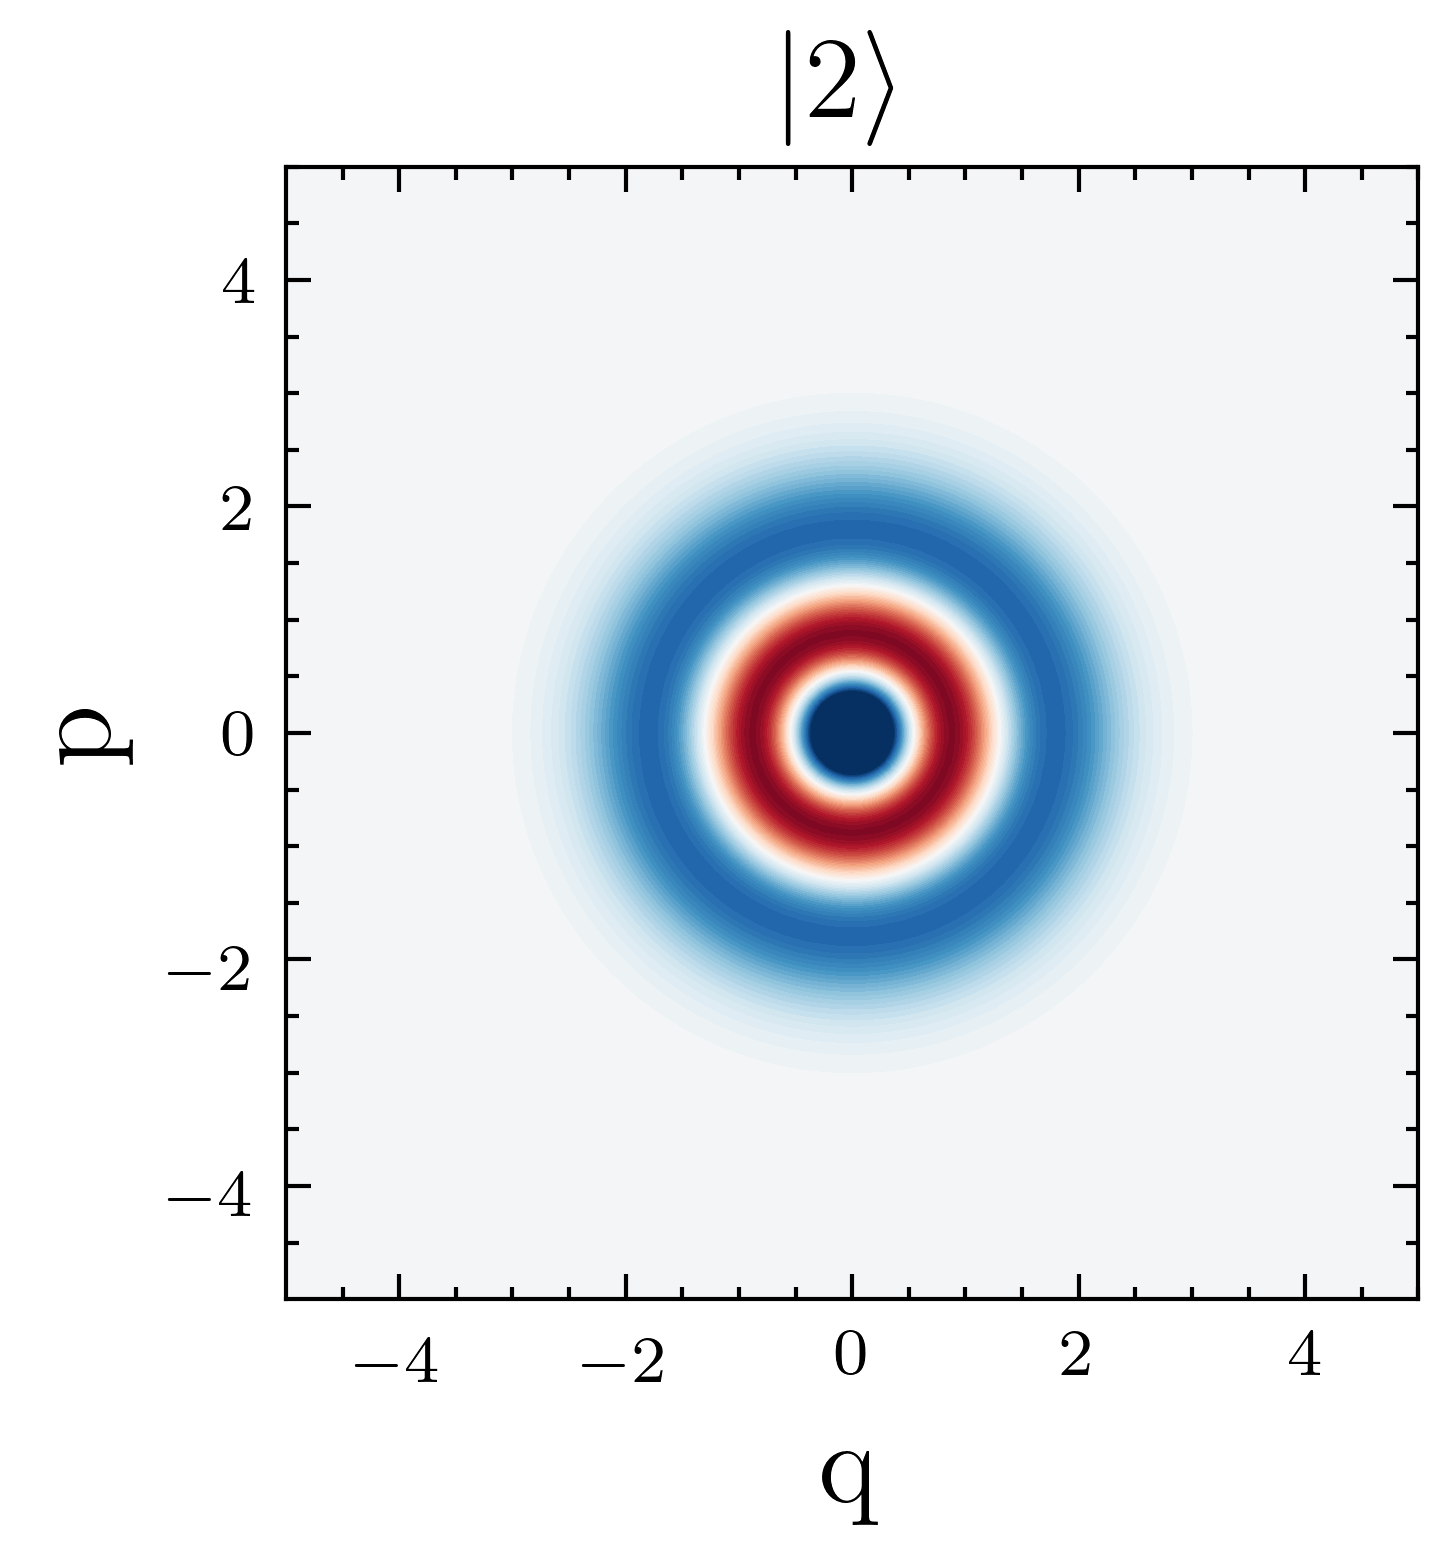

In [6]:
fig, ax = plt.subplots()
ax.contourf(xvec, xvec, W2, 100, cmap=cm.RdBu, norm=nrm1)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.set_title("$|2\\rangle$", fontsize=14)
ax.set_aspect(1)

ax.autoscale(tight=True)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)



fig.savefig('fock_wigner_2.pdf')
fig.savefig('fock_wigner_2.png', dpi=300)

# Coherent state

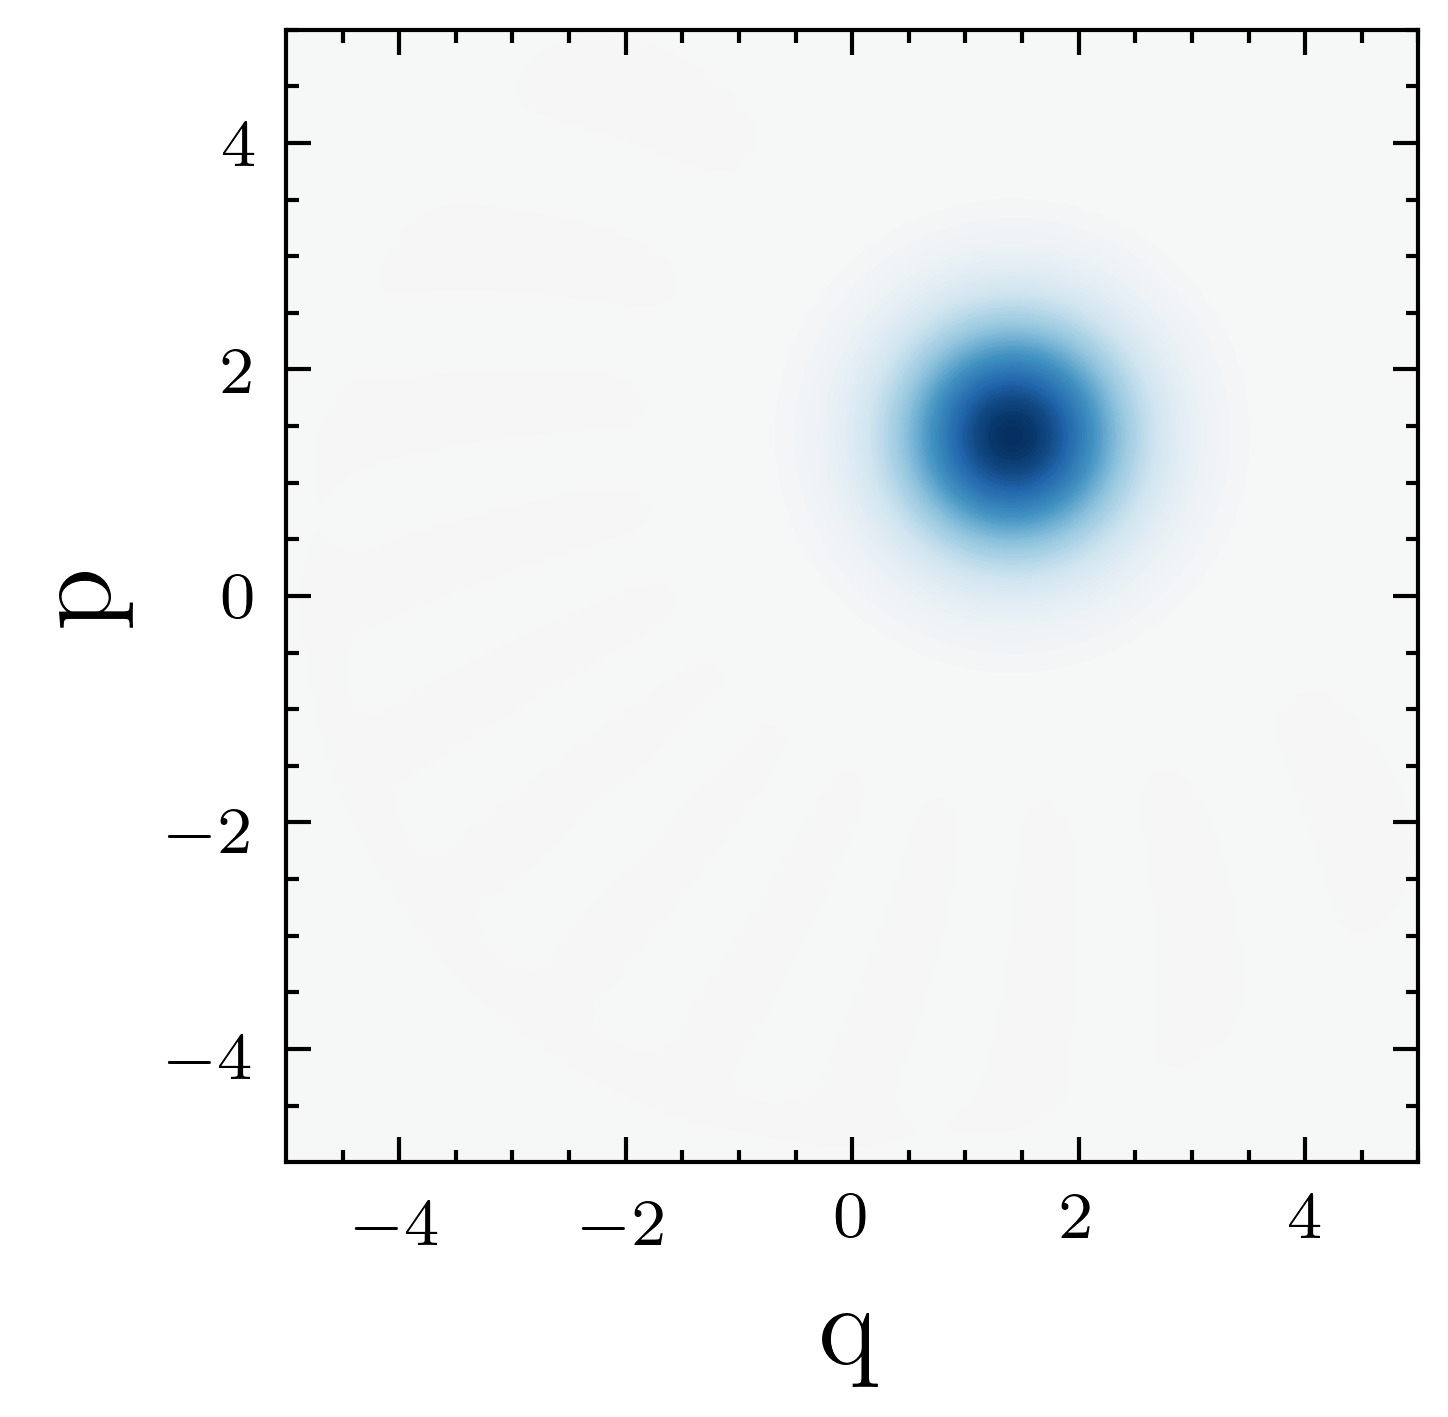

In [40]:
dims = 15
state = qt.coherent_dm(dims, 1.0+1.0J, method="analytic")
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W = qt.wigner(state, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

fig.savefig('coherent.png', dpi=300)

# Quadrature squeezed Wigner function

In [43]:
?qt.squeeze

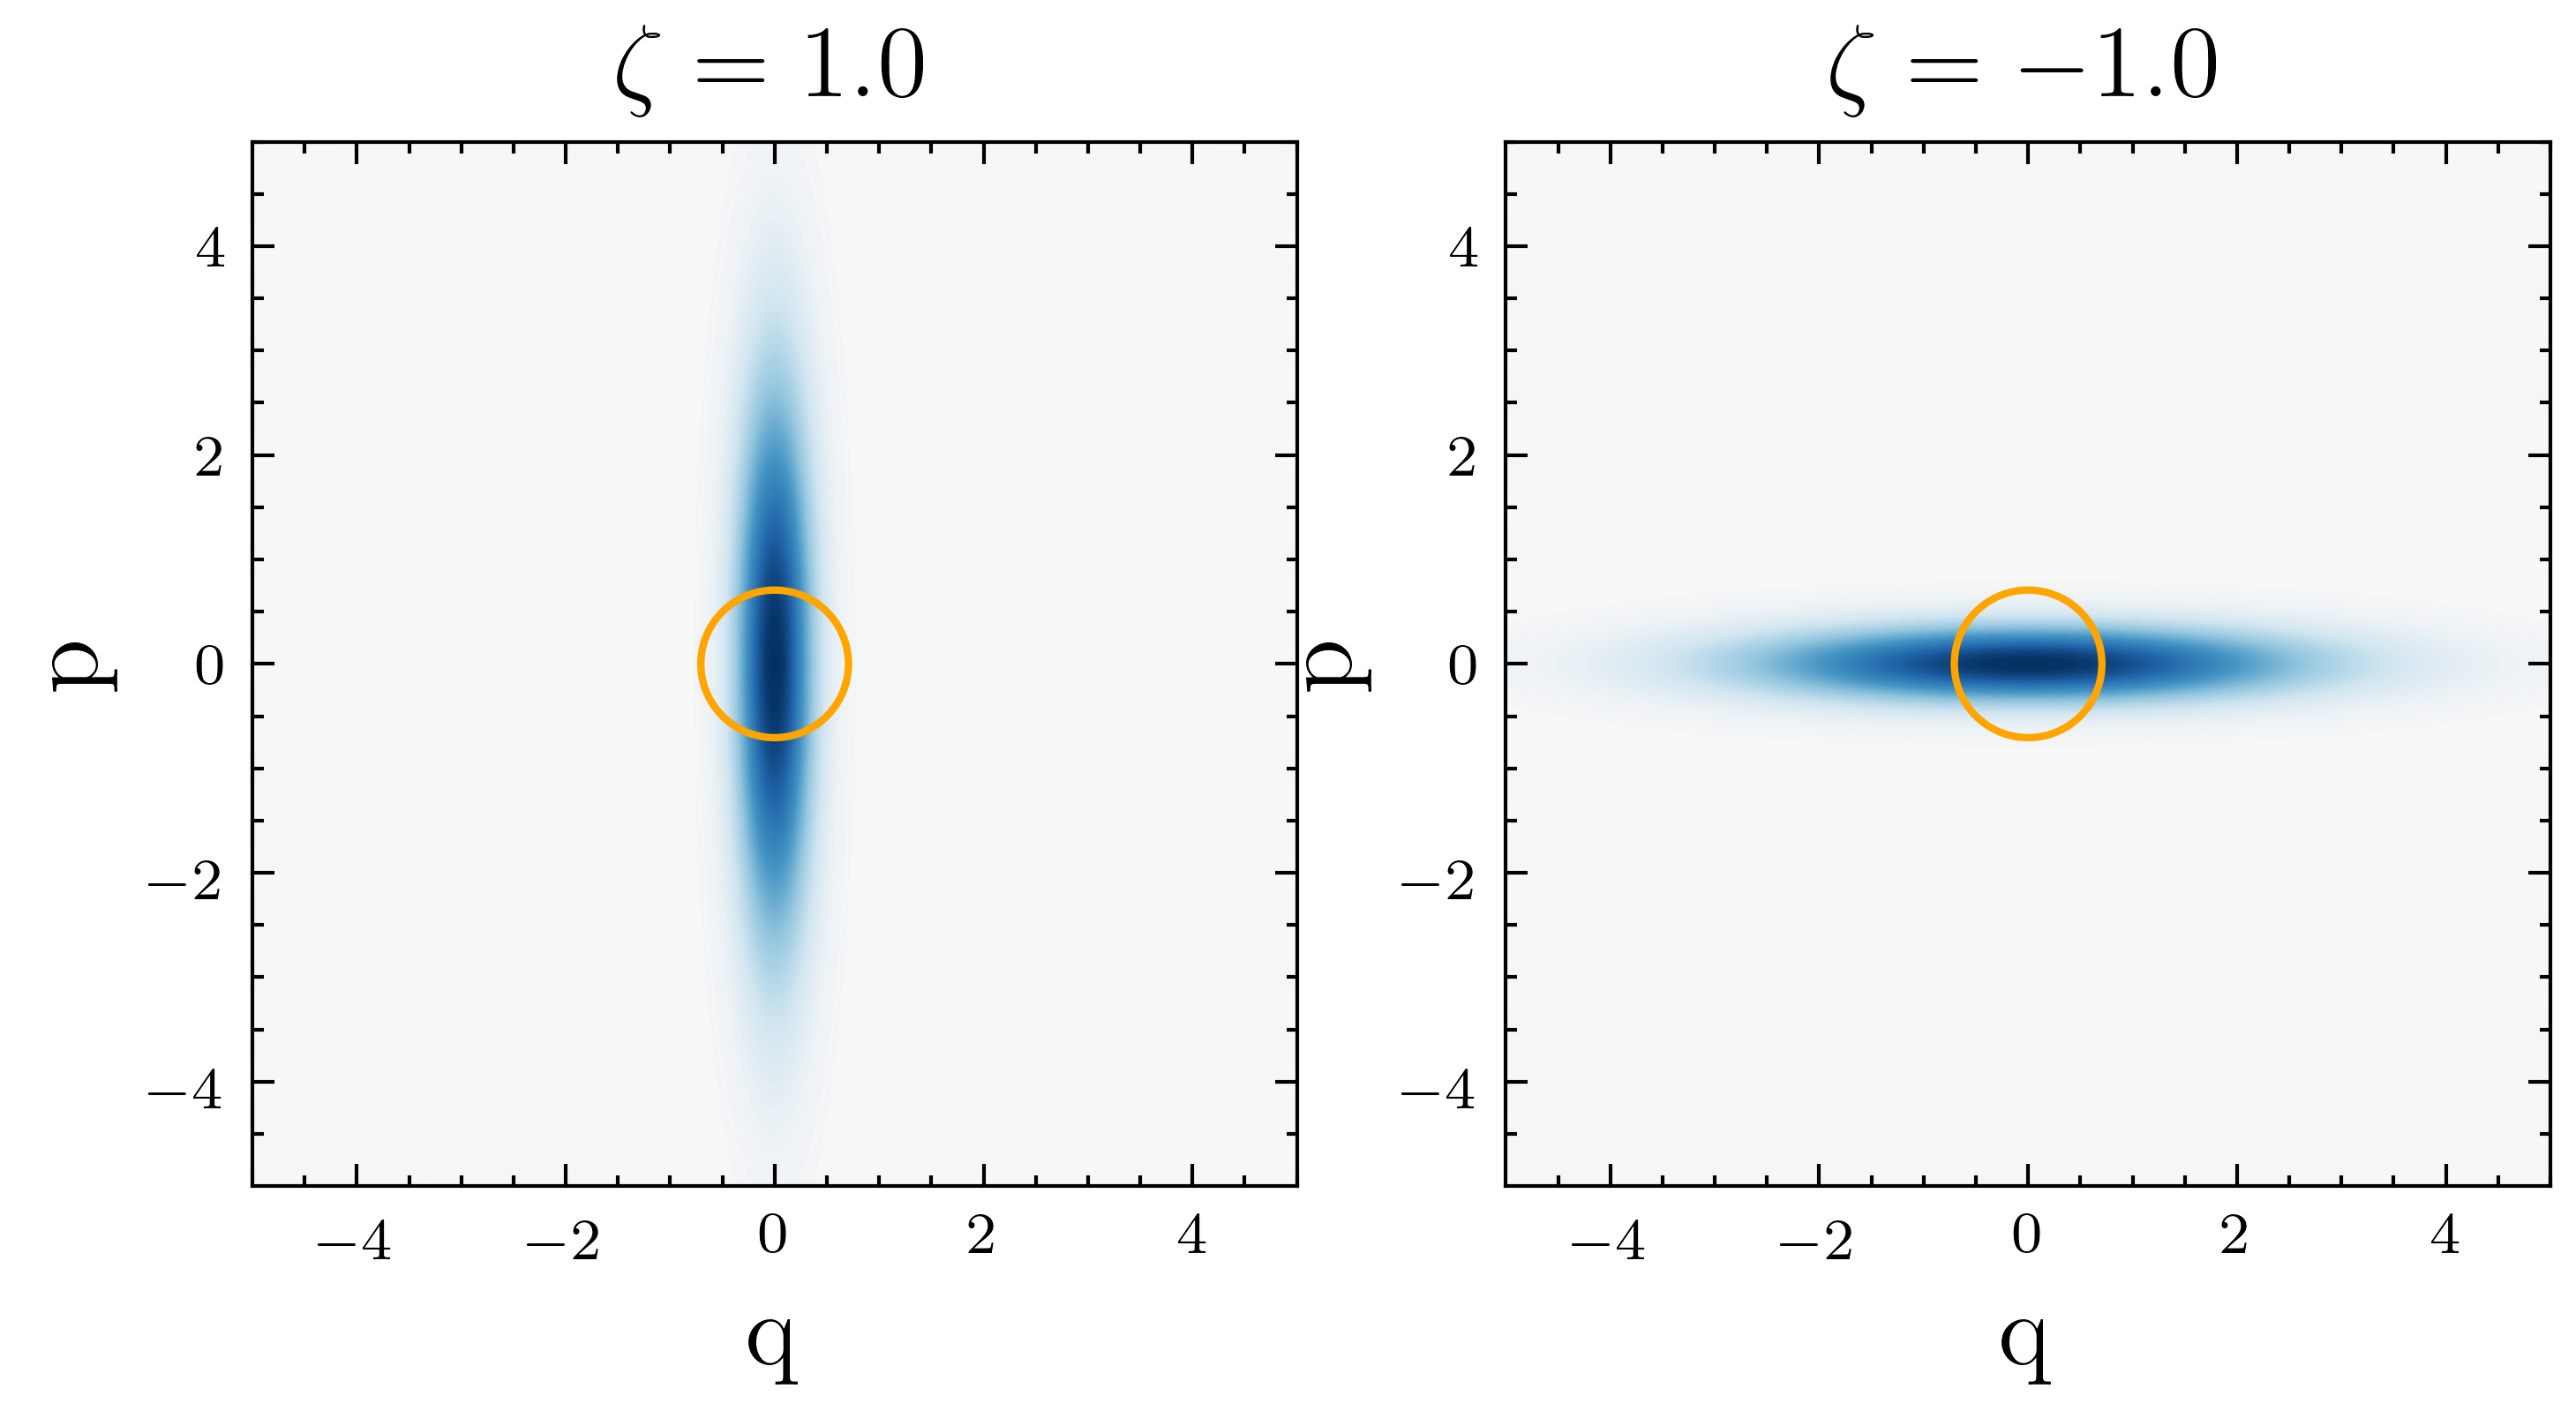

In [50]:
dims = 50
sp=1.0
state1 = qt.ket2dm( qt.squeeze(dims, sp) * qt.coherent(dims, 0.0, method="analytic"))
sp=-1.0
state2 = qt.ket2dm( qt.squeeze(dims, sp) * qt.coherent(dims, 0.0, method="analytic"))
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(state1, xvec, xvec)
W2 = qt.wigner(state2, xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

fig, ax = plt.subplots(1, 2, figsize=(2*x, x))
ax[0].contourf(xvec, xvec, W1, 100, cmap=cm.RdBu, norm=nrm1)
ax[1].contourf(xvec, xvec, W2, 100, cmap=cm.RdBu, norm=nrm2)
ax[0].set_xlabel("q")
ax[0].set_ylabel("p")
ax[1].set_xlabel("q")
ax[1].set_ylabel("p")
ax[0].set_title("$\\zeta = 1.0$", fontsize=14)
ax[1].set_title("$\\zeta = -1.0$", fontsize=14)
ax[0].set_aspect(1)
ax[1].set_aspect(1)

ax[0].autoscale(tight=True)
ax[1].autoscale(tight=True)

ax[0].xaxis.label.set_size(14)
ax[0].yaxis.label.set_size(14)
ax[1].xaxis.label.set_size(14)
ax[1].yaxis.label.set_size(14)

X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax[0].contour(X,Y,F,[0], colors=["orange"])
ax[1].contour(X,Y,F,[0], colors=["orange"])

fig.savefig('squeeze.png', dpi=300)

In [7]:
dims = 50
sp=1.0
state1 = qt.ket2dm( qt.squeeze(dims, sp) * qt.coherent(dims, 0.0, method="analytic"))
sp=-1.0
state2 = qt.ket2dm( qt.squeeze(dims, sp) * qt.coherent(dims, 0.0, method="analytic"))
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(state1, xvec, xvec)
W2 = qt.wigner(state2, xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

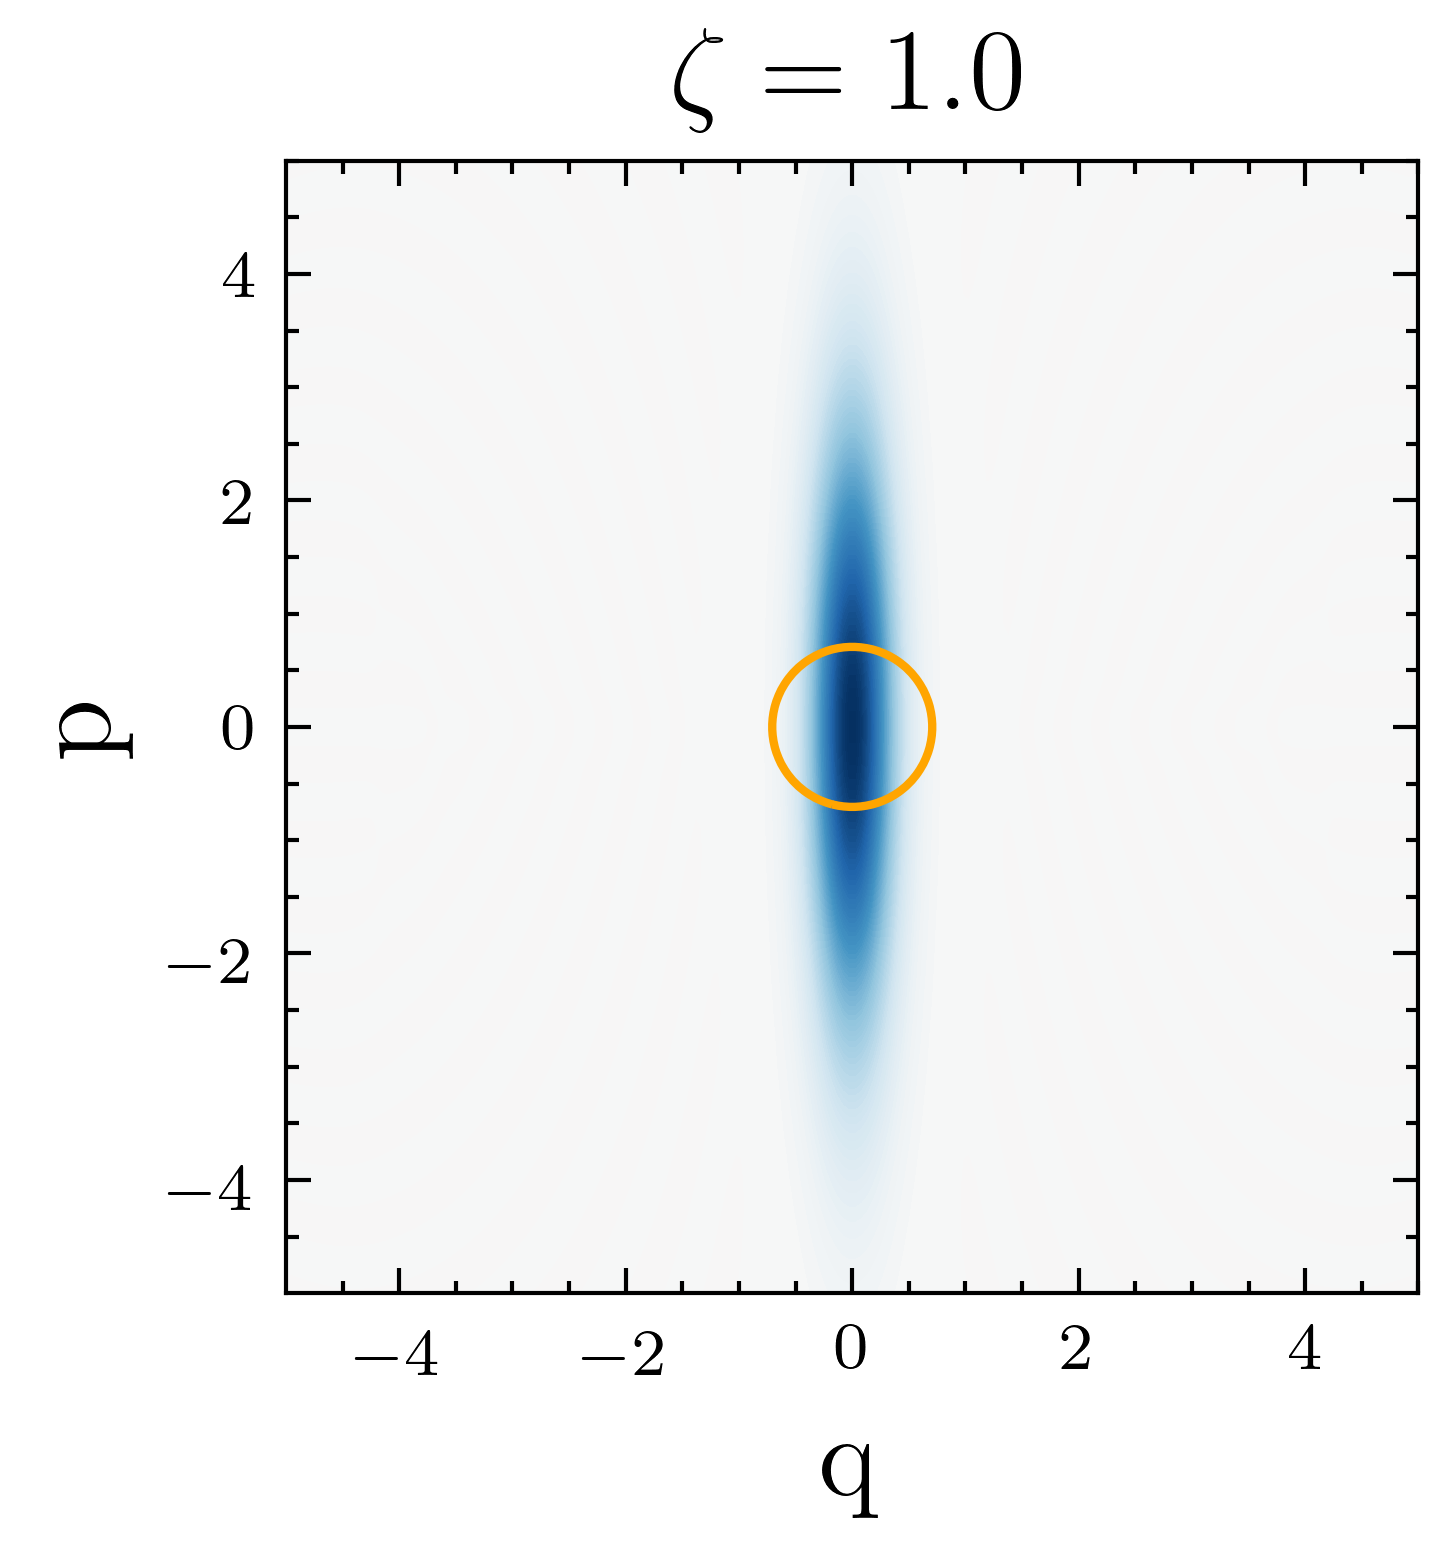

In [8]:
fig, ax = plt.subplots()
ax.contourf(xvec, xvec, W1, 100, cmap=cm.RdBu, norm=nrm1)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.set_ylabel("p")
ax.set_title("$\\zeta = 1.0$", fontsize=14)
ax.set_aspect(1)

ax.autoscale(tight=True)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)


X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax.contour(X,Y,F,[0], colors=["orange"])


fig.savefig('squeeze_1.png', dpi=300)
fig.savefig('squeeze_1.pdf')

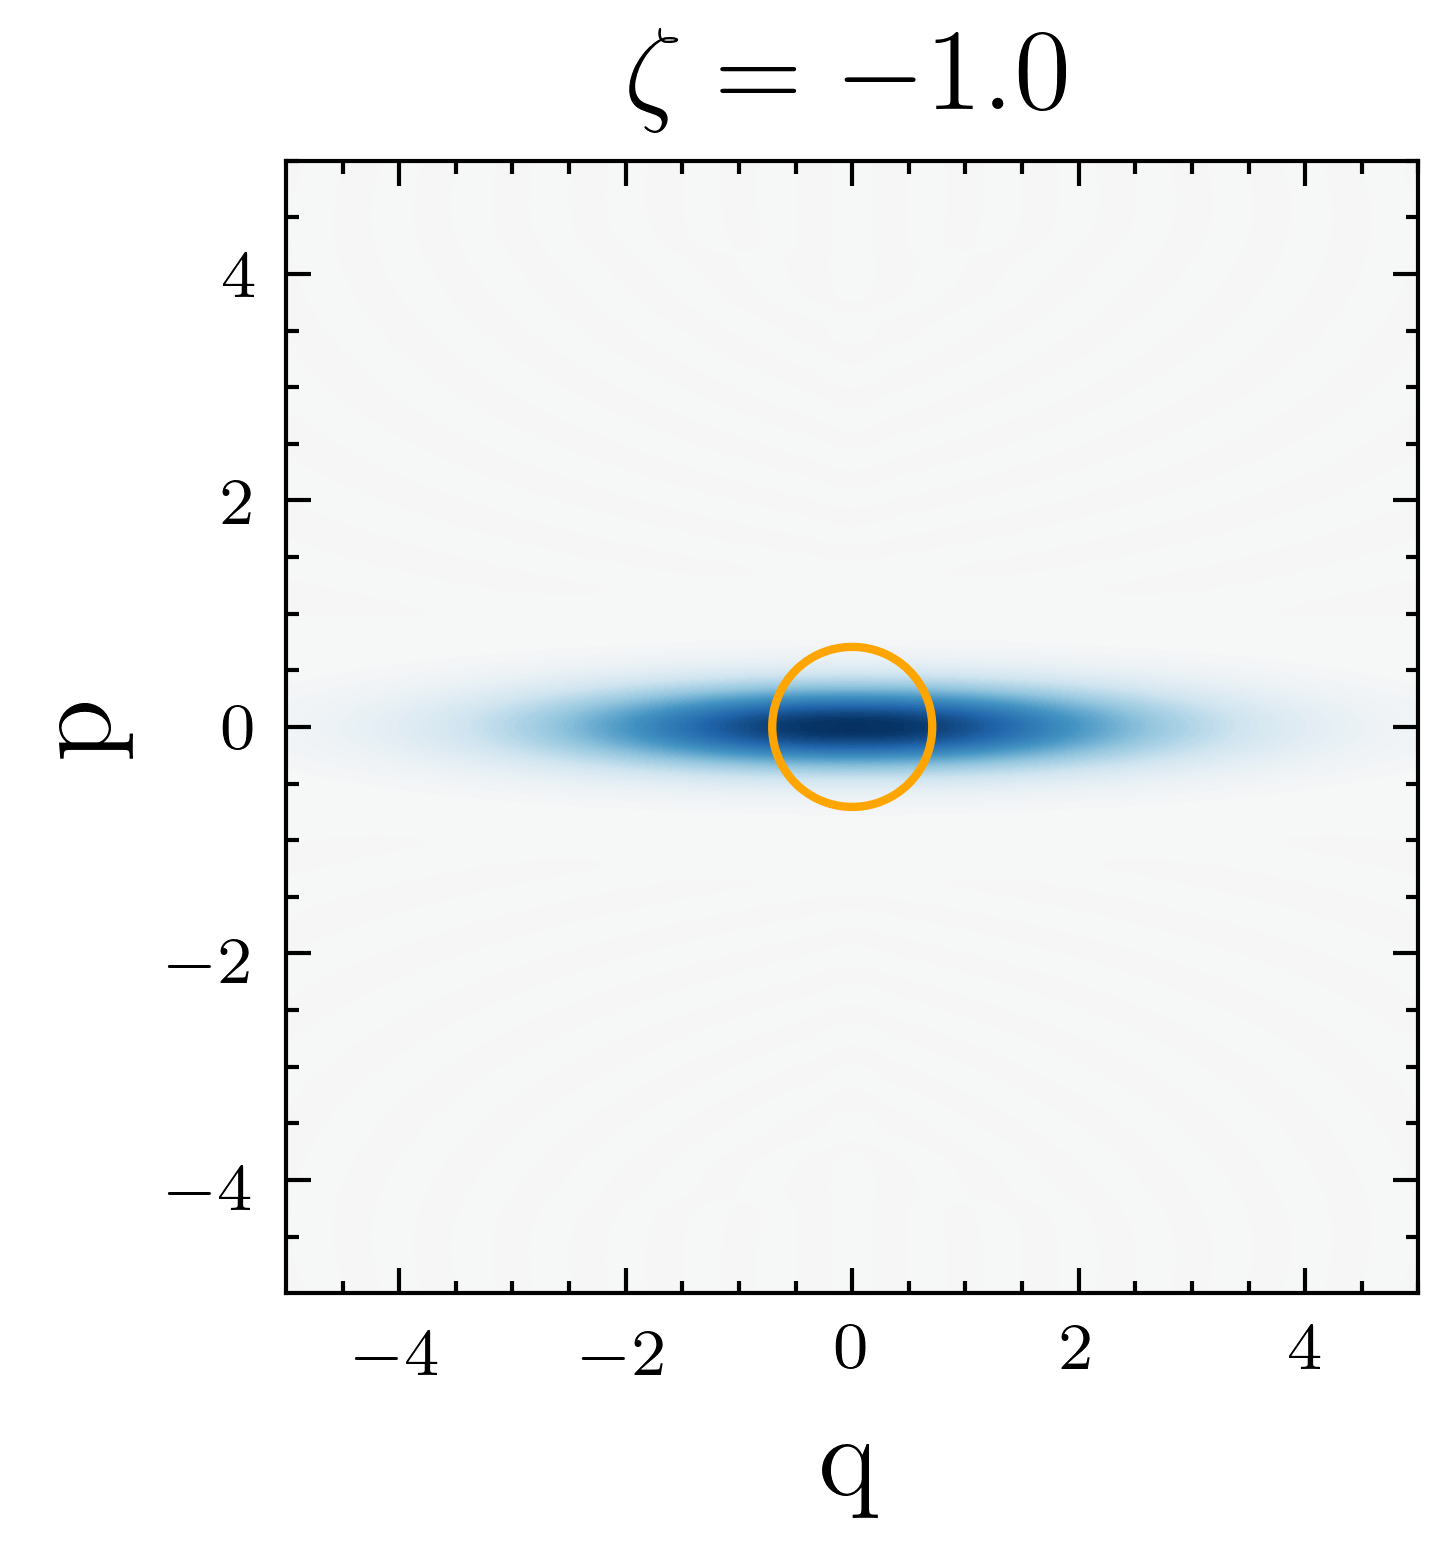

In [9]:
fig, ax = plt.subplots()
ax.contourf(xvec, xvec, W2, 100, cmap=cm.RdBu, norm=nrm2)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.set_ylabel("p")
ax.set_title("$\\zeta = -1.0$", fontsize=14)
ax.set_aspect(1)

ax.autoscale(tight=True)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)


X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax.contour(X,Y,F,[0], colors=["orange"])


fig.savefig('squeeze_2.png', dpi=300)
fig.savefig('squeeze_2.pdf')

# Photon-number squeezed

In [65]:
options=qt.Options(nsteps=10000)
# options=qt.Options()
# defining input parameters
N = 50 # hilbert space size
tlist = np.linspace(0, 0.1, 101) # times over which to solve
gamma = 8.0 # decay rate 
omega = 0.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qt.destroy(N) # annihilation operator
n = qt.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
# U=2.0
# H = U * ad * ad * a * a
H = omega * ad * a

# input state
psi0 = qt.coherent(N, alphain, method="operator")
# psi0 = (qt.fock(N, 8) + qt.fock(N, 9) + qt.fock(N, 1) + qt.fock(N, 3) + qt.fock(N, 4) + qt.fock(N, 6)).unit()
coplist = [np.sqrt(gamma) * a*(n - 1)]
# coplist = []

In [66]:
import time
start_time = time.time()
result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
end_time = time.time()
print(end_time - start_time)

26.95551037788391


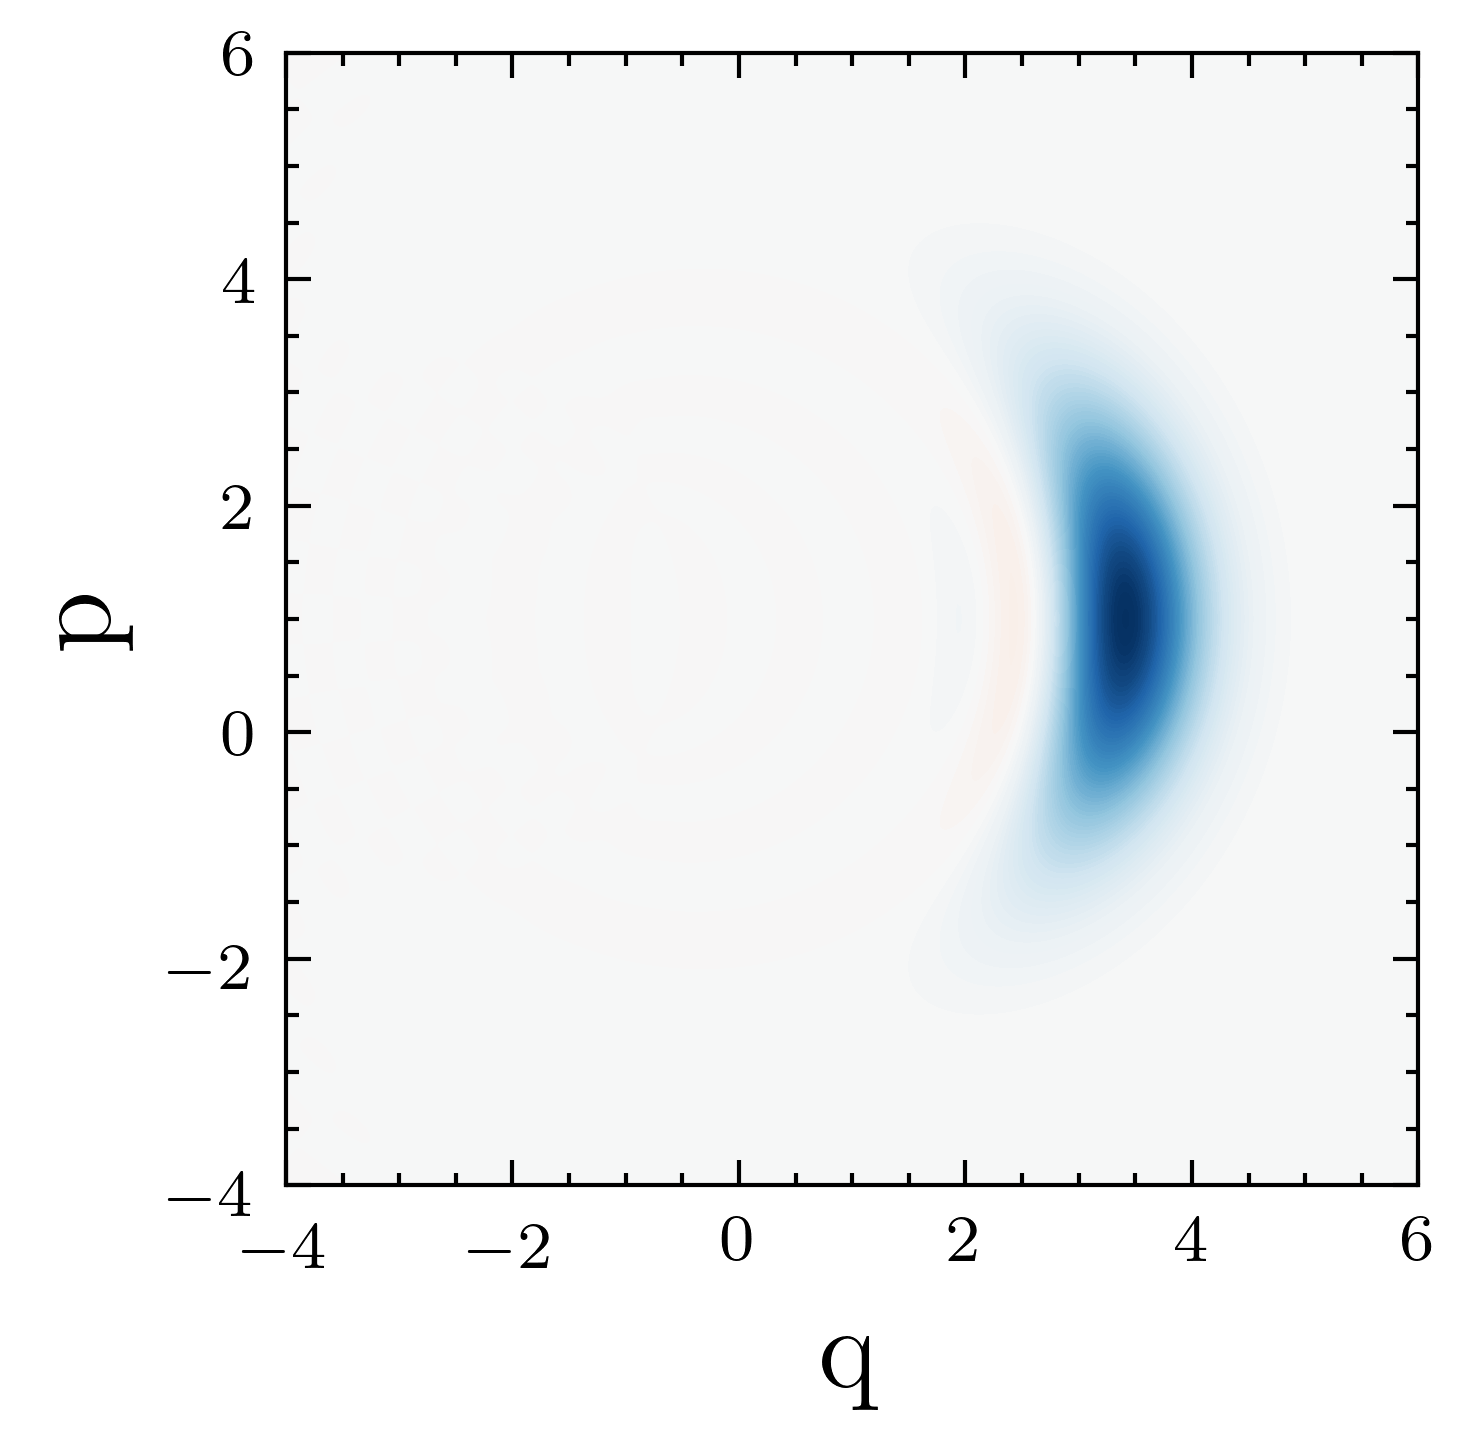

In [69]:

state = result.states[1]


xmin = -4
xmax = 6
xvec = np.linspace(xmin, xmax, 500)
ymin = -5
ymax = - ymin
yvec = np.linspace(ymin, ymax, 500)
W = qt.wigner(state, xvec, yvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())


fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)


# X, Y = np.meshgrid(xvec, xvec)
# F = X**2 + Y**2 - 0.5
# ax.contour(X,Y,F,[0], colors=["orange"])

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)


fig.savefig('photon_number_squeezed.png', dpi=300)

# EC histogram QDS attacks

Let's look at histograms of Eve's state after an EC attack

In [ ]:
# coh_tmsv_heterodyne_conditionalstate(b, alphak, T, barn, dims, qobjQ=True, mixedQ=True)

In [3]:
import AQC_background as aqc

In [4]:
_b = 1.0
_alphak = 1.0
_T = 0.5
_barn = 0.5
_dims = 20
mystate = aqc.coh_tmsv_heterodyne_conditionalstate(_b, _alphak, _T, _barn, _dims)
myoutcome = aqc.coh_tmsv_heterodyne_outcome(_b, _alphak, _T, _barn, _dims)

In [5]:
(mystate/myoutcome).norm()

1.0000001405088748

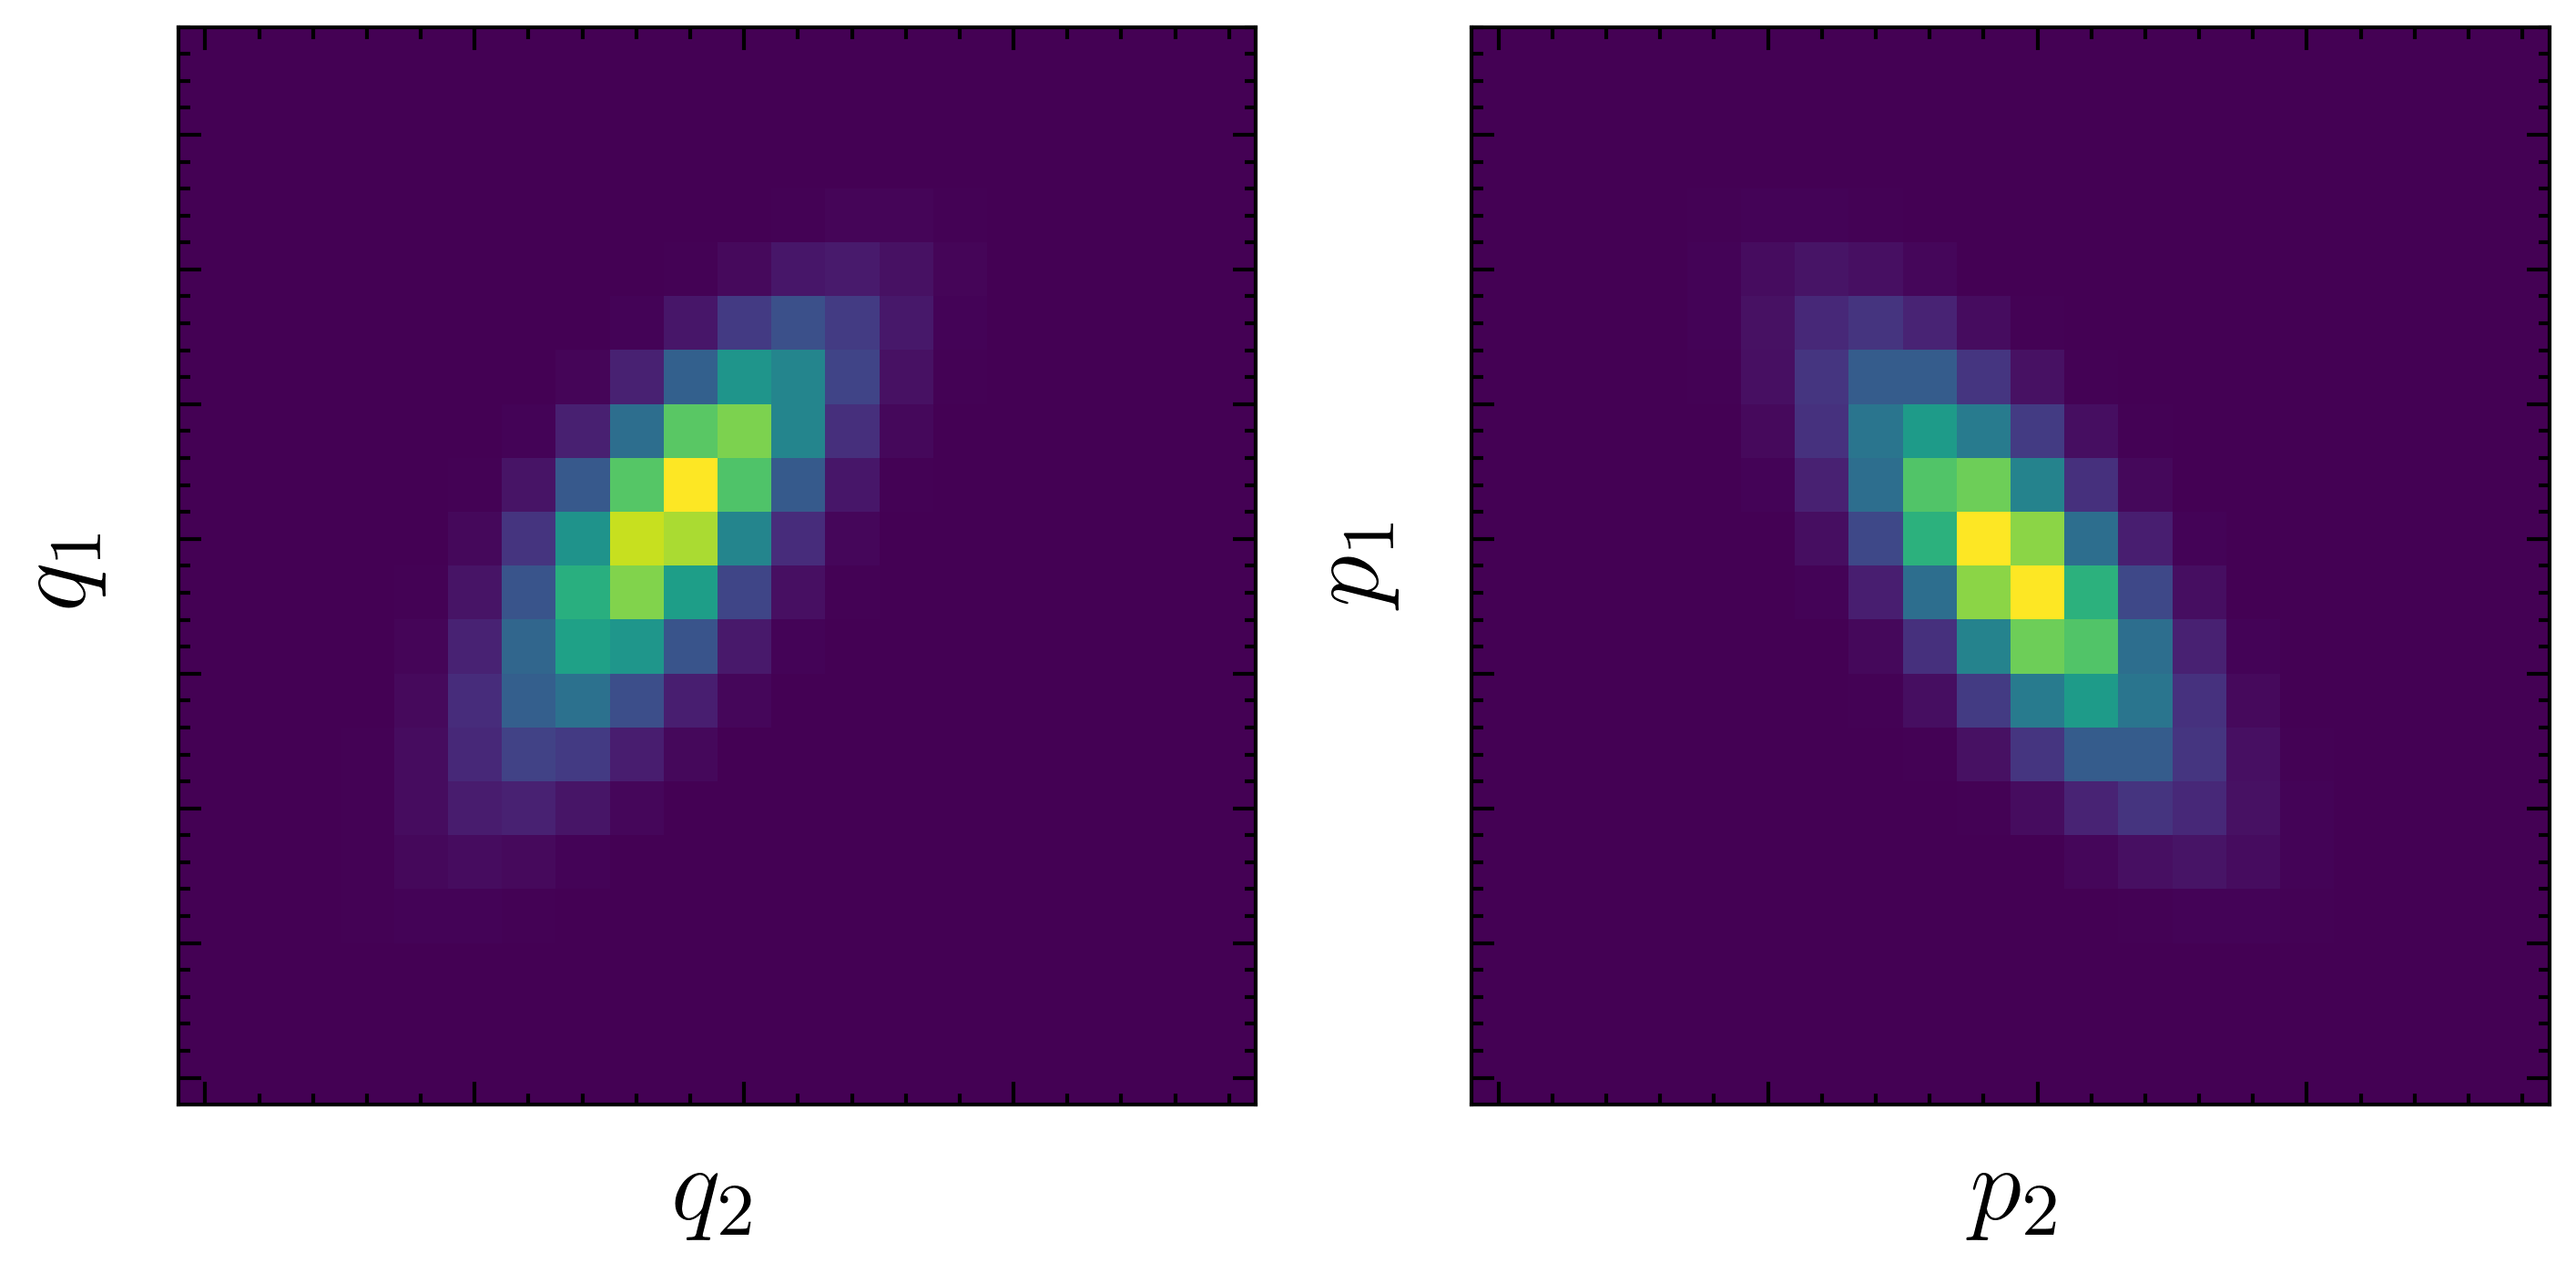

In [6]:
# barn=0.5
# dims=100
# tmsv_state = tmsv(barn, dims)
# rho = tmsv_state
# dims = rho.dims[0][0]
x=2.8

rho = (mystate/myoutcome)
dims=_dims

x_eigensystem = qt.position(dims).eigenstates()
x_eigenvalues = x_eigensystem[0]
x_eigenstates = x_eigensystem[1]

p_eigensystem = qt.momentum(dims).eigenstates()
p_eigenvalues = p_eigensystem[0]
p_eigenstates = p_eigensystem[1]


x_1_eigenstates = [qt.tensor(qt.ket2dm(x_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(x_eigenvalues))]
x_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(x_eigenstates[i])) for i in np.arange(len(x_eigenvalues))]

p_1_eigenstates = [qt.tensor(qt.ket2dm(p_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(p_eigenvalues))]
p_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(p_eigenstates[i])) for i in np.arange(len(p_eigenvalues))]


mymatX = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatX[i][j] = np.real((x_1_eigenstates[i] * x_2_eigenstates[j] * rho).tr())


mymatP = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatP[i][j] = np.real((p_1_eigenstates[i] * p_2_eigenstates[j] * rho).tr())

fig, axes = plt.subplots(1, 2, figsize=(2*x, x))

xplot = axes[0].imshow(np.array(mymatX), origin=0)#extent=[x_2_min, x_2_max, x_1_min, x_1_max])
pplot = axes[1].imshow(np.array(mymatP), origin=0)# extent=[p_2_min, p_2_max, p_1_min, p_1_max])
axes[0].set_aspect(1)
axes[1].set_aspect(1)

axes[0].set_xlabel("$q_2$")
axes[0].set_ylabel("$q_1$")
axes[1].set_xlabel("$p_2$")
axes[1].set_ylabel("$p_1$")

axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])

axes[0].xaxis.label.set_size(14)
axes[0].yaxis.label.set_size(14)

axes[1].xaxis.label.set_size(14)
axes[1].yaxis.label.set_size(14)

# fig.savefig('ec_histogram_2.pdf')
# fig.savefig('ec_histogram_2.png', dpi=300)

In [8]:
import QDS1 as qds1

In [ ]:
ec_integratedstate_onequad(alpha, T, barn, dims, lim, mixedQ)

In [ ]:
_alpha = 0.5
_T = 0.5
_barn = 0.2
_dims = 15
_lim = 5
_teststate = qds1.ec_integratedstate_onequad(_alpha, _T, _barn, _dims, _lim, mixedQ=True)

Running entanglingcloner_attack.parallel_integrate_onequad() with alpha = 0.5, T = 0.5, barn = 0.2 dims = 15, lim = 5mixedQ = True


In [ ]:
_teststate.shape

In [ ]:
_teststate.norm()

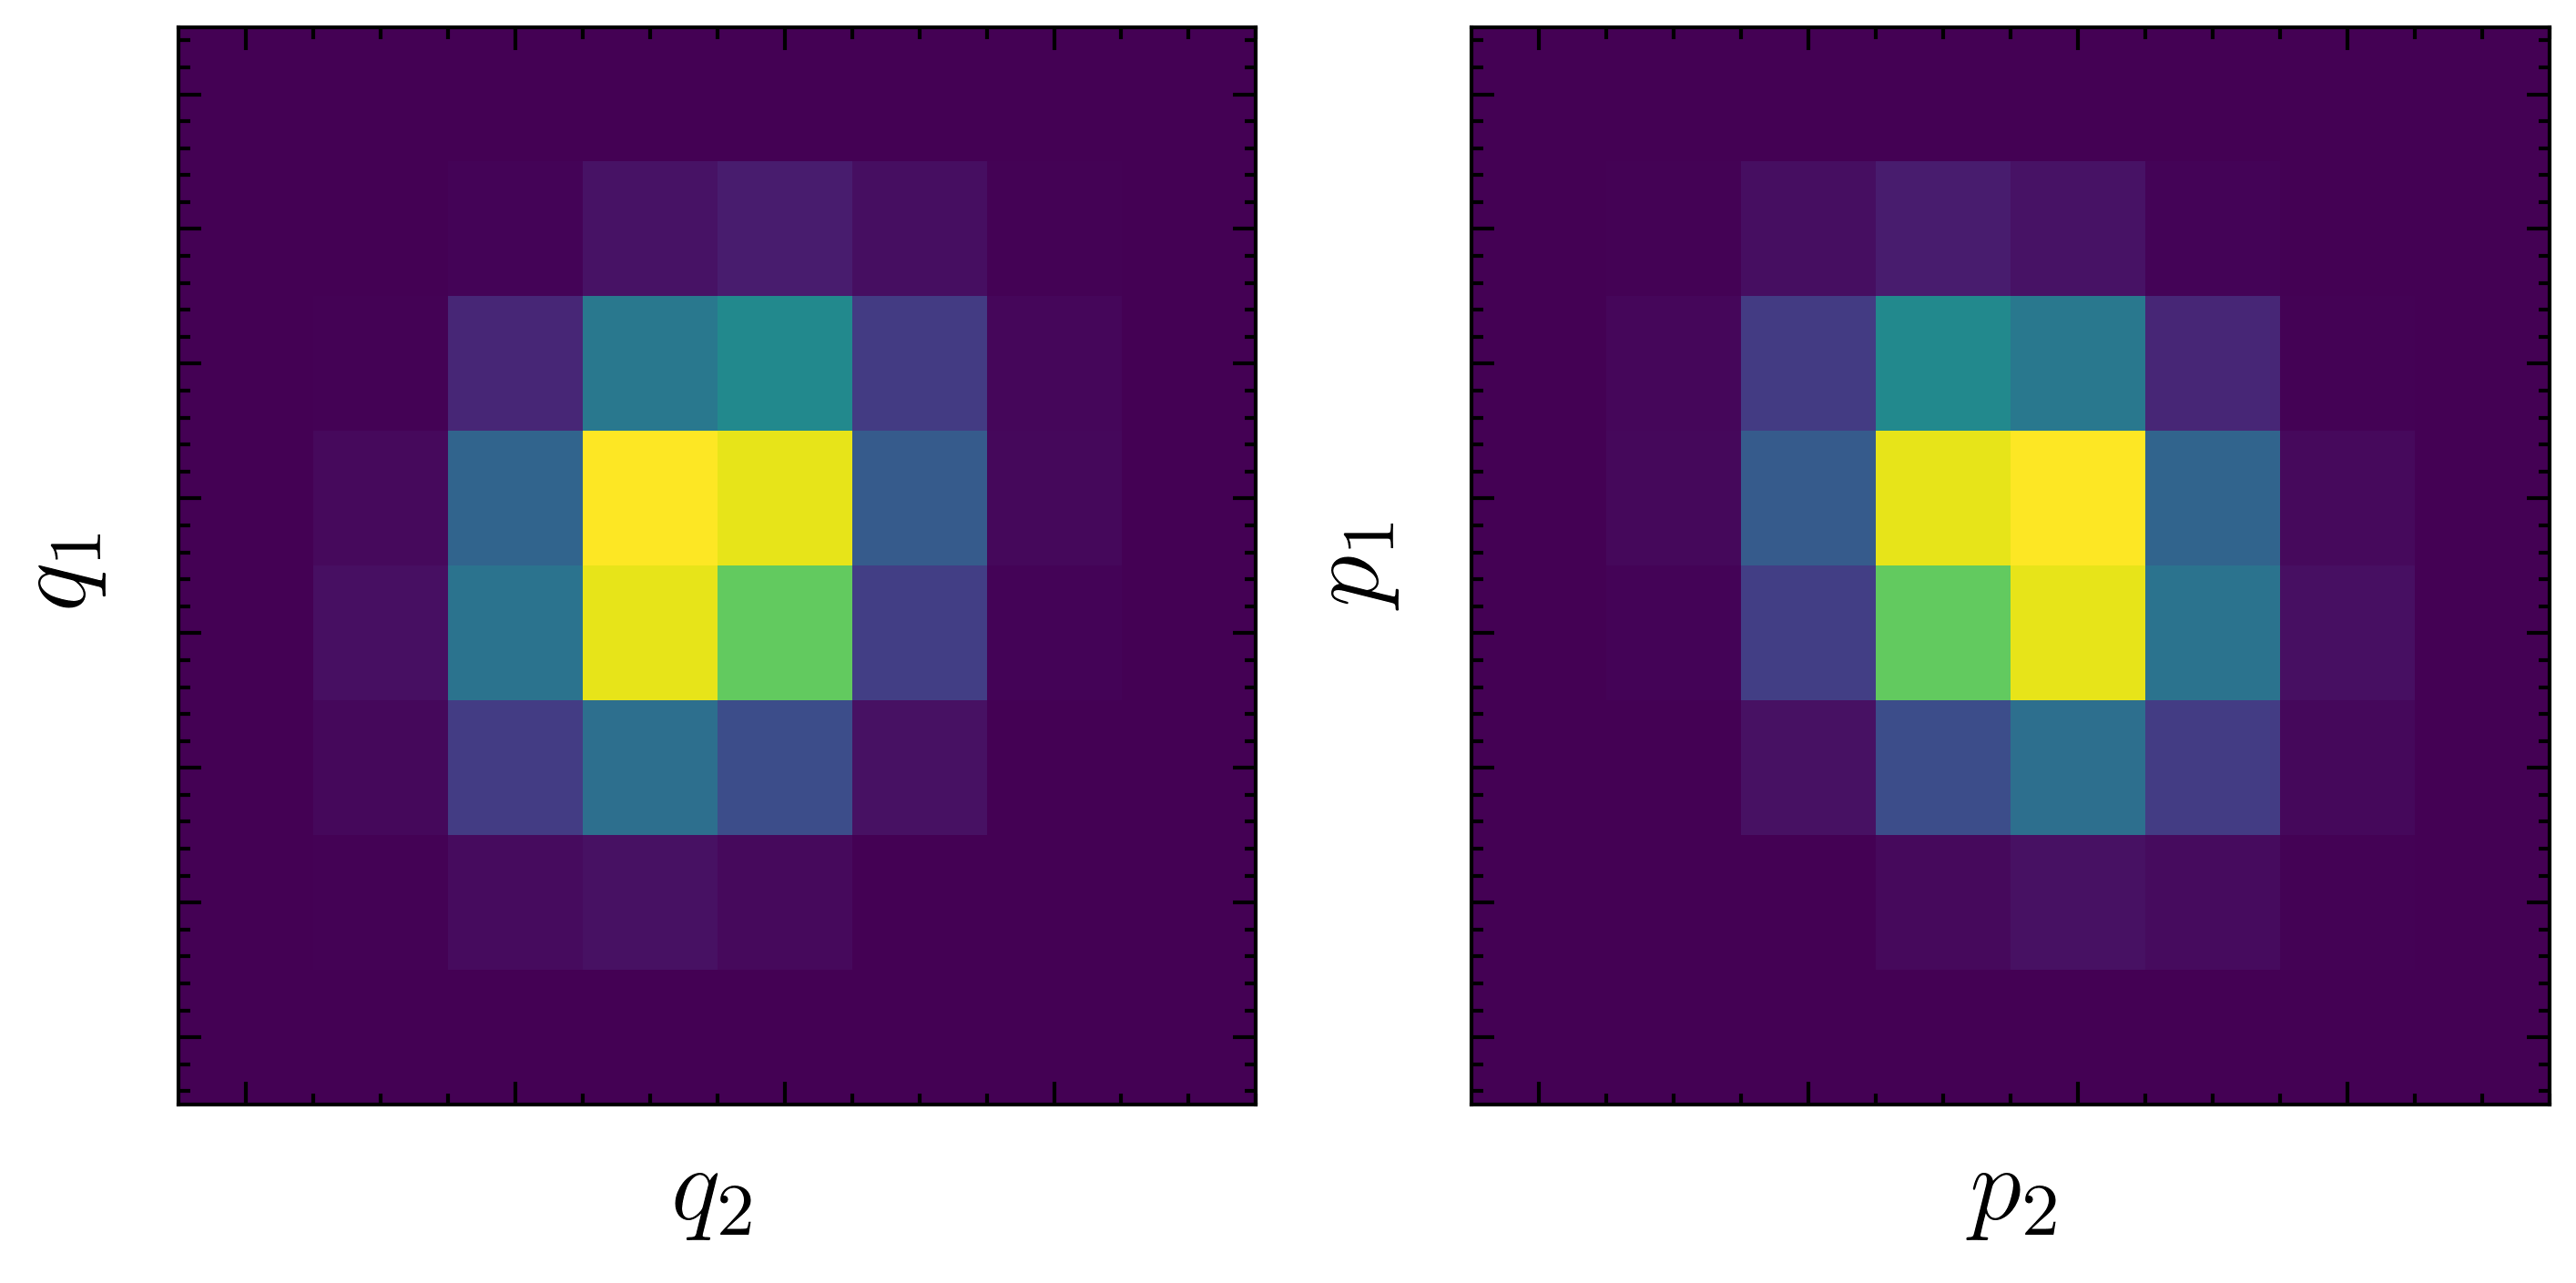

In [13]:
x=2.8

rho = _teststate
dims=_dims

x_eigensystem = qt.position(dims).eigenstates()
x_eigenvalues = x_eigensystem[0]
x_eigenstates = x_eigensystem[1]

p_eigensystem = qt.momentum(dims).eigenstates()
p_eigenvalues = p_eigensystem[0]
p_eigenstates = p_eigensystem[1]


x_1_eigenstates = [qt.tensor(qt.ket2dm(x_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(x_eigenvalues))]
x_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(x_eigenstates[i])) for i in np.arange(len(x_eigenvalues))]

p_1_eigenstates = [qt.tensor(qt.ket2dm(p_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(p_eigenvalues))]
p_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(p_eigenstates[i])) for i in np.arange(len(p_eigenvalues))]


mymatX = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatX[i][j] = np.real((x_1_eigenstates[i] * x_2_eigenstates[j] * rho).tr())


mymatP = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatP[i][j] = np.real((p_1_eigenstates[i] * p_2_eigenstates[j] * rho).tr())

fig, axes = plt.subplots(1, 2, figsize=(2*x, x))

xplot = axes[0].imshow(np.array(mymatX), origin=0)#extent=[x_2_min, x_2_max, x_1_min, x_1_max])
pplot = axes[1].imshow(np.array(mymatP), origin=0)# extent=[p_2_min, p_2_max, p_1_min, p_1_max])
axes[0].set_aspect(1)
axes[1].set_aspect(1)

axes[0].set_xlabel("$q_2$")
axes[0].set_ylabel("$q_1$")
axes[1].set_xlabel("$p_2$")
axes[1].set_ylabel("$p_1$")

axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])

axes[0].xaxis.label.set_size(14)
axes[0].yaxis.label.set_size(14)

axes[1].xaxis.label.set_size(14)
axes[1].yaxis.label.set_size(14)

# fig.savefig('ec_histogram_2.pdf')
# fig.savefig('ec_histogram_2.png', dpi=300)